In [1]:
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import matplotlib
from matplotlib import cm
import networkx as nx
import powerlaw
import pandas as pd
import itertools
import seaborn as sns

In [2]:
print('np:', np.__version__)
print('pd:', pd.__version__)
print('nx:', nx.__version__)
print('matplotlib:', matplotlib.__version__)
print('seaborn:', sns.__version__)
print('powerlaw:', powerlaw.__version__)

np: 1.26.4
pd: 2.1.4
nx: 3.1
matplotlib: 3.8.0
seaborn: 0.12.2
powerlaw: 1.5


In [33]:
from matplotlib import font_manager, rc
# 한글 폰트가 깨지지 않기 위한 세팅
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
file_lst = ['0306','0709','10','11_phy','12_phy_cm','12_phy_eqm']

# 함수 정의

In [4]:
def graph(file_name):
    '''
    개별 교과(목)의 성취기준을 묶어서 네트워크를 만듦.
    '''
    G = nx.Graph()

    f = open(f"Eng_Phy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                continue
            else:
                G.add_node(i)
        # 에지 ij와 그의 weight 추가
        for idx, i in enumerate(data_line):
            for jdx, j in enumerate(data_line):
                if idx >= jdx:
                    continue
                if G.has_edge(i, j):
                    G[i][j]['weight'] += 1
                else:
                    G.add_edge(i, j, weight=1)
    # 노드 i의 노드 강도 추가
    f = open(f"Eng_Phy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
    
    return G

In [5]:
def subject_graph(itr, seed, k, file_name):
    '''
    개별 교과(목)의 성취기준을 묶어서 네트워크를 만들고, 노드와 에지에 대한 정보를 시각적으로 표시.
    단, 함수 fruchterman_reingold_layout를 활용하여, 그림이 무작위하게 나오지 않게 방지.
    itr, seed, k 변수는 해당 함수의 파라미터를 의미하고 다음과 같다:
    - itr = Number of iterations of spring-force relaxation
    - seed = Seed number
    - k = Optimal distance between nodes.
    '''
    G = nx.Graph()

    f = open(f"Eng_Phy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                continue
            else:
                G.add_node(i)
        # 에지 ij와 그의 weight 추가
        for idx, i in enumerate(data_line):
            for jdx, j in enumerate(data_line):
                if idx >= jdx:
                    continue
                if G.has_edge(i, j):
                    G[i][j]['weight'] += 1
                else:
                    G.add_edge(i, j, weight=1)
    # 노드 i의 노드 강도 추가
    f = open(f"Eng_Phy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
                    
    # 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
    node_weights = {node: data['weight'] for node, data in G.nodes(data=True)}
    edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

    # 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
    #node_size = [node_weights[node] * 20 for node in G.nodes()]
    edge_width = [edge_weights[edge] * 0.1 for edge in G.edges()]
    
    # 노드 색상 매핑을 위한 컬러맵 설정
    cmap = plt.get_cmap('Reds')  # viridis 컬러맵 사용
    norm = plt.Normalize(min(node_weights.values()), max(node_weights.values()))  # 노드 가중치에 따라 정규화

    # 노드 색상 설정
    node_colors = [cmap(norm(node_weights[node])) for node in G.nodes()]

    # 그래프 그리기
    pos = nx.fruchterman_reingold_layout(G, k=k, iterations=itr, weight='weight', seed=seed)  # 그래프의 노드 위치 결정
    fig, ax = plt.subplots(figsize=(6,4), dpi=300)
    nx.draw(G, pos, with_labels=True,
            node_color=node_colors, node_size=100, width=edge_width,
            font_family = font, font_size=3)
    
    # 컬러바
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Node strength') ##'ax=ax' 지정
    
    plt.show()

In [6]:
def entire_Graph():
    '''
    모든 교과(목)의 성취기준을 묶어서 네트워크를 만듦.
    '''
    G = nx.Graph()
    
    for file_name in file_lst:
        f = open(f"Eng_Phy_{file_name}.txt", 'r', encoding='UTF-8')
        for line in f:
            data_line = list(set(line.split()))
            # 노드 i 추가
            for i in data_line:
                if G.has_node(i):
                    continue
                else:
                    G.add_node(i)        
            # 에지 ij와 그의 weight 추가
            for idx, i in enumerate(data_line):
                for jdx, j in enumerate(data_line):
                    if idx >= jdx:
                        continue
                    if G.has_edge(i, j):
                        G[i][j]['weight'] += 1
                    else:
                        G.add_edge(i, j, weight=1)
        # 노드 i의 노드 강도 추가
        f = open(f"Eng_Phy_{file_name}.txt", 'r', encoding='UTF-8')
        for line in f:
            data_line = list(set(line.split()))
            for i in data_line:
                sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
                G.nodes[i]['weight'] = sum_weight
    return G

In [7]:
def basic_info(G):
    '''
    Edge degree dist, Node strength dist, Edge weight dist 값
    (여기서 node weight는 node strenght를 의미)
    '''
    hist_edges = []
    hist_nodeWeight = []
    hist_edgeWeight = []

    for i in list(G.nodes):
        hist_edges.append(G.degree[i])
        hist_nodeWeight.append(G.nodes[i]['weight'])

    for edge in list(G.edges):
        i, j = edge[0], edge[1]
        hist_edgeWeight.append(G[i][j]['weight'])

    print(f'Number of nodes: {G.number_of_nodes()}')
    print(f'Number of edges: {G.number_of_edges()}')
    
    print(f'Degree avg: {round(np.average(hist_edges), 2)}, Degree std: {round(np.std(hist_edges), 2)}')
    print(f'EdgeWeight avg: {round(np.average(hist_edgeWeight), 2)}, EdgeWeight std: {round(np.std(hist_edgeWeight), 2)}')
    print(f'NodeWeight avg: {round(np.average(hist_nodeWeight), 2)}, NodeWeight std: {round(np.std(hist_nodeWeight), 2)}')
    
    return hist_edges, hist_edgeWeight, hist_nodeWeight

In [8]:
def hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight):
    '''
    Edge degree dist, Node strength dist, Edge weight dist 그림
    (여기서 node weight는 node strenght를 의미)
    '''
    plt.figure(figsize=(13,4), dpi=300)
    
    plt.subplot(1,3,1)
    plt.title('Dist. of node degree')
    plt.hist(hist_edges)
    plt.yscale('log')
    plt.xlabel('Node degree')
    
    plt.subplot(1,3,2)
    plt.title('Dist. of edge weight')
    plt.hist(hist_edgeWeight)
    plt.yscale('log')
    plt.xlabel('Edge weight')

    plt.subplot(1,3,3)
    plt.title('Dist. of node strength')
    plt.hist(hist_nodeWeight)
    plt.yscale('log')
    plt.xlabel('Node strength')

In [9]:
def power_plot(hist_edges, hist_edgeWeight, hist_nodeWeight):
    '''
    분포가 멱급수 분포를 따르는지 확인.
    '''
    # Dist. of degree
    fit = powerlaw.Fit(hist_edges)
    R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
    if p >= 0.05:
        print(f"Dist. of degree: Pass, {fit.power_law.alpha}\n")

    # Dist. of edge weight
    fit = powerlaw.Fit(hist_edgeWeight)
    R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
    if p >= 0.05:
        print(f"Dist. of degree: Pass, {fit.power_law.alpha}\n")

    # Dist. of node strength
    fit = powerlaw.Fit(hist_nodeWeight)
    R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
    if p >= 0.05:
        print(f"Dist. of node strength: Pass, {fit.power_law.alpha}\n")

In [10]:
def info(G):
    '''
    Node degree, Node strength, Edge weight, BC 값이 큰 노드 또는 에지 나열.
    '''
    node_degree = dict(G.degree())

    # 각 엣지의 가중치(weight) 계산
    edge_weight = dict(nx.get_edge_attributes(G, 'weight'))

    # 각 노드의 강도(weight) 계산
    node_strength = dict(nx.degree(G, weight='weight'))

    # betweenness centrality 계산
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    H = G.subgraph(largest_component)
    betweenness_centrality = nx.current_flow_betweenness_centrality(H, weight='weight')

    # 결과 출력
    #print("Node Degree:")
    data = sorted(node_degree.items(), key=lambda x: x[1], reverse=True)
    df2 = pd.DataFrame(data, columns=['Node_ND','Node Degree'])

    #print("\nEdge Weight:")
    data = sorted(edge_weight.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Edge', 'Edge Weight'])

    #print("\nNode Strength:")
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df4 = pd.DataFrame(data, columns=['Node_NS', 'Node Strength'])

    #print("\nBetweenness Centrality:")
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', 'Betweenness Centrality'])

    df = pd.concat([df2,df3,df4,df5],axis=1)
    
    return df

# 1. 물리학 용어 네트워크 

## 전체 물리학 용어 네트워크 기본 통계

In [11]:
G = entire_Graph()

In [12]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)

Number of nodes: 243
Number of edges: 852
Degree avg: 7.01, Degree std: 6.49
EdgeWeight avg: 1.14, EdgeWeight std: 0.53
NodeWeight avg: 7.98, NodeWeight std: 8.97


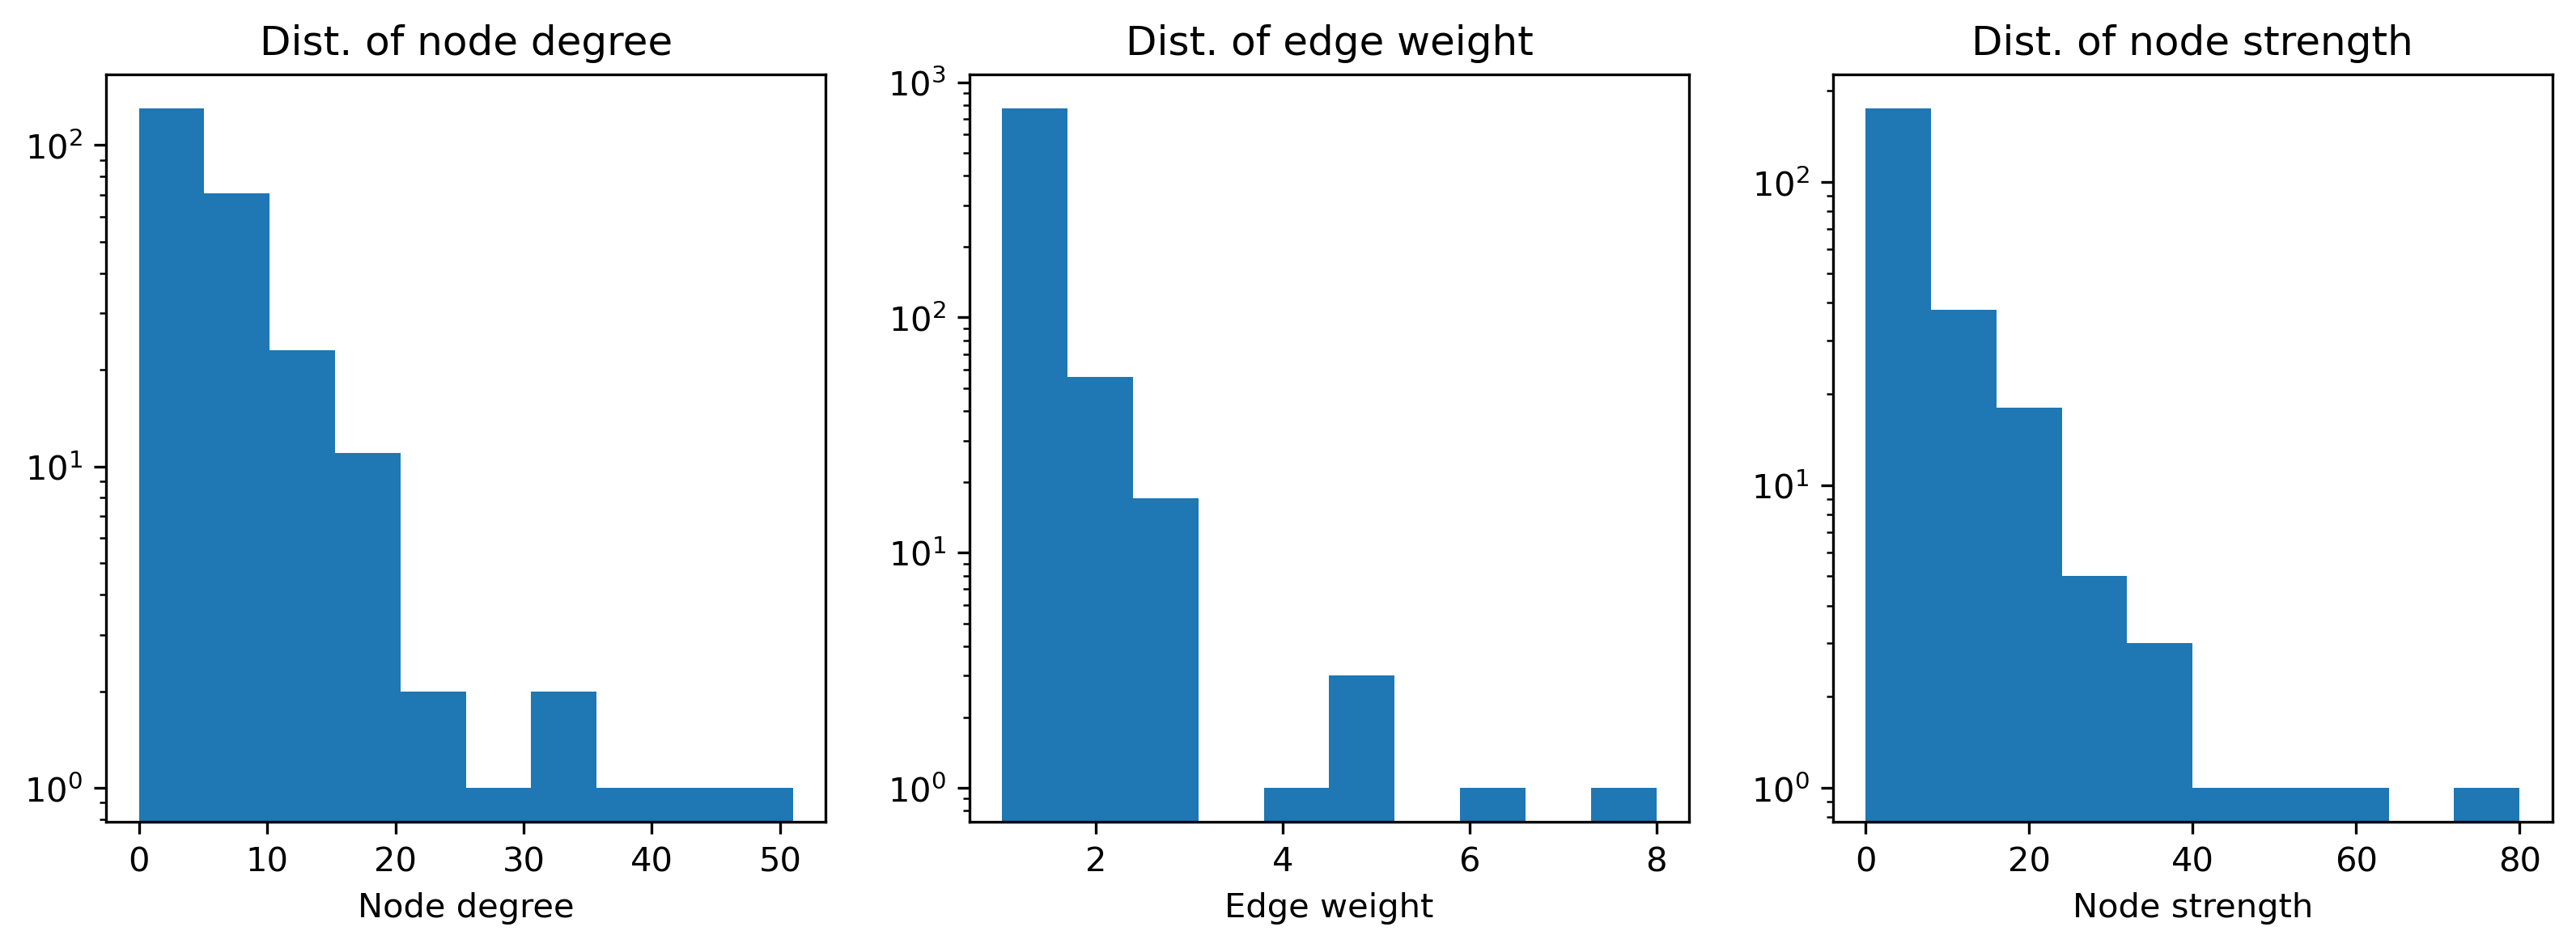

In [13]:
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [14]:
power_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Dist. of degree: Pass, 4.0781267593571275

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Dist. of node strength: Pass, 3.453916657685464



C:\Users\sec\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


In [15]:
df = info(G)
df.head(20)

Node_ND  Node Degree                   Edge  Edge Weight  \
0              Object         51.0       (Object, Motion)            8   
1               Light         43.0        (Force, Object)            6   
2              Matter         37.0           (Force, Act)            5   
3              Motion         33.0          (Object, Act)            5   
4              Energy         31.0        (Matter, Phase)            5   
5           Transform         26.0    (Energy, Transform)            4   
6                Heat         23.0     (Force, Direction)            3   
7               Force         21.0        (Object, Light)            3   
8               Phase         20.0         (Object, Time)            3   
9           Direction         20.0        (Matter, Light)            3   
10              Earth         19.0        (Gas, Pressure)            3   
11  Mechanical_energy         18.0          (Gas, Volume)            3   
12                Act         17.0     (Act, Equilibrium)            3   
13            Gravity         17.0          (Act, Motion)            3   
14          Formation         17.0     (Pressure, Volume)            3   
15        Interaction         17.0  (Volume, Temperature)            3   
16   Electric_current         16.0    (Light, Refraction)            3   
17   Conservation_law         16.0       (Light, Reflect)            3   
18       Interference         16.0         (Mirror, Lens)            3   
19                Gas         15.0      (Motion, Gravity)            3   

              Node_NS  Node Strength            Node_BC  \
0              Object           80.0              Light   
1               Light           56.0             Object   
2              Motion           48.0             Matter   
3              Matter           47.0             Motion   
4               Force           35.0             Energy   
5              Energy           35.0              Phase   
6           Transform           33.0          Transform   
7                 Act           30.0               Heat   
8               Phase           26.0       Interference   
9                Heat           25.0           Transmit   
10          Direction           25.0              Force   
11  Mechanical_energy           24.0              Earth   
12                Gas           21.0          Direction   
13            Element           20.0  Mechanical_energy   
14        Temperature           19.0              Sound   
15            Gravity           19.0        Interaction   
16   Conservation_law           19.0                Act   
17          Formation           19.0      Semiconductor   
18              Earth           19.0           Spectrum   
19   Electric_current           18.0        Electricity   

    Betweenness Centrality  
0                 0.298037  
1                 0.287116  
2                 0.188850  
3                 0.148757  
4                 0.146563  
5                 0.118867  
6                 0.116714  
7                 0.113137  
8                 0.092395  
9                 0.085750  
10                0.085629  
11                0.082407  
12                0.081177  
13                0.078189  
14                0.071734  
15                0.071201  
16                0.068102  
17                0.067824  
18                0.066361  
19                0.063641

## Node Strength 기준 핵심 용어

In [16]:
result1 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(file_lst[idx-1])
        file = file_lst[idx-1]
    node_strength = dict(nx.degree(G, weight='weight'))
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Node_NS', file])
    result1 = pd.concat([result1, df3], axis=1)

print('Node Strength')
result1.head(10)

Node Strength


Node_NS  Total           Node_NS  0306         Node_NS  0709  \
0     Object     80            Object  25.0          Object  31.0   
1      Light     56             Force  10.0          Motion  27.0   
2     Motion     48            Matter   8.0           Force  16.0   
3     Matter     47               Gas   8.0          Matter  15.0   
4      Force     35             Light   8.0         Gravity  12.0   
5     Energy     35           Battery   8.0        Transmit  11.0   
6  Transform     33        Connection   8.0        Particle  10.0   
7        Act     30  Electric_circuit   8.0           Model  10.0   
8      Phase     26       Temperature   7.0  Particle_model  10.0   
9       Heat     25             Share   6.0       Direction  10.0   

            Node_NS    10            Node_NS  11_phy            Node_NS  \
0             Earth  19.0              Light    14.0             Object   
1    Early_universe  13.0          Transform    11.0             Motion   
2           Element  13.0             Energy    11.0               Heat   
3         Formation  13.0  Mechanical_energy    10.0             Planet   
4         Transform  12.0                Act     9.0  Mechanical_energy   
5            Matter   9.0   Conservation_law     8.0                Act   
6          Spectrum   7.0      Semiconductor     8.0              Force   
7  Celestial_bodies   7.0             Sensor     7.0          Spaceship   
8             Light   7.0               Heat     6.0             Launch   
9          Emission   7.0        Electricity     6.0           Momentum   

   12_phy_cm       Node_NS  12_phy_eqm  
0       14.0         Light        20.0  
1       13.0   Probability        14.0  
2       13.0       Digital        11.0  
3       11.0       Quantum        11.0  
4       10.0     Direction        10.0  
5        9.0     Intensity        10.0  
6        9.0        Energy        10.0  
7        7.0  Interference         9.0  
8        7.0      Spectrum         7.0  
9        7.0        Create         7.0

## Betweenness Centrality 기준 핵심 용어

In [17]:
result2 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(file_lst[idx-1])
        file = file_lst[idx-1]
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    H = G.subgraph(largest_component)
    betweenness_centrality = nx.current_flow_betweenness_centrality(H, weight='weight')
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', file])
    result2 = pd.concat([result2, df5], axis=1)

print('Betweenness Centrality')
result2.head(10)

Betweenness Centrality


Node_BC     Total      Node_BC      0306           Node_BC      0709  \
0         Light  0.298037       Object  0.788332            Object  0.456678   
1        Object  0.287116        Light  0.313468            Motion  0.436328   
2        Matter  0.188850       Matter  0.295373             Model  0.315845   
3        Motion  0.148757          Gas  0.255961             Force  0.309820   
4        Energy  0.146563        Phase  0.236754         Transform  0.286417   
5         Phase  0.118867  Temperature  0.206567        Resistance  0.264505   
6     Transform  0.116714        Water  0.166869  Electric_current  0.258736   
7          Heat  0.113137        Sound  0.154425           Gravity  0.182138   
8  Interference  0.092395       Weight  0.125433          Transmit  0.164606   
9      Transmit  0.085750        Force  0.114458            Matter  0.157906   

           Node_BC        10            Node_BC    11_phy  \
0            Earth  0.713654  Mechanical_energy  0.563022   
1        Transform  0.380366             Energy  0.491653   
2           Matter  0.131289   Conservation_law  0.490476   
3   Early_universe  0.127176                Act  0.341975   
4          Element  0.127176          Transform  0.338539   
5        Formation  0.127176             Sensor  0.286905   
6  Hydrogen_fusion  0.081633               Heat  0.160886   
7             Flow  0.081633   Potential_energy  0.112698   
8              Sun  0.081633               Work  0.112698   
9           Energy  0.081633     Kinetic_energy  0.112698   

                   Node_BC  12_phy_cm                Node_BC  12_phy_eqm  
0                   Object   0.451729                  Light    0.711296  
1                   Motion   0.376993           Interference    0.482223  
2                   Planet   0.352644                 Energy    0.300101  
3        Mechanical_energy   0.316766            Probability    0.268500  
4                      Act   0.108096               Inductor    0.170040  
5                    Force   0.108096                Digital    0.168730  
6            Kepler's_laws   0.084323                Quantum    0.165962  
7                Satellite   0.084323            Diffraction    0.126181  
8                  Gravity   0.084323               Hologram    0.126181  
9  Newton's_laws_of_motion   0.082907  Particle_wave_duality    0.069701

# 2. 커뮤니티 분석

## 커뮤니티 탐색

In [20]:
G = entire_Graph()

In [21]:
# Girvan-Newman 알고리즘을 사용하여 커뮤니티 탐지
comp = nx.community.greedy_modularity_communities(G, weight='weight')
communities = list(comp)

len(communities)

15

In [22]:
# 모듈도
nx.community.modularity(G, comp)

0.5999817883809871

In [23]:
# 모든 연결 성분 찾기
connected_components = list(nx.connected_components(G))

# 가장 큰 연결 성분 찾기
giant_component = max(connected_components, key=len)

# 가장 큰 연결 성분으로 구성된 서브그래프 생성
G_giant = G.subgraph(giant_component)

# Girvan-Newman 알고리즘을 사용하여 커뮤니티 탐지
comp_giant = nx.community.greedy_modularity_communities(G_giant, weight='weight')
communities_giant = list(comp_giant)

len(communities_giant) # Largest component에서의 커뮤니티 수

7

In [24]:
# 각 커뮤니티를 구성하는 노드 수
for i in communities_giant:
    print(len(i))

51
46
34
32
30
18
13


In [25]:
# 각 커뮤니티를 구성하는 단어
for i in range(7):

    lst = []
    for i in communities_giant[i]:
        lst.append(i)

    print(lst)
    print()

['Transmission', 'Electric_current', 'Magnetic_field', 'Electric_motor', 'Reflect', 'Mechanical_energy', 'Power_consumption', 'Model', 'Resource', 'Coil', 'Parallel_connection', 'Input_device', 'Electric_energy', 'Mass', 'Hydrogen_fusion', 'Perpetual_mobile', 'Electrical_signal', 'Speaker', 'Refraction', 'Electric_circuit', 'Proceed', 'Sun', 'Light', 'Resistance', 'Serial_connection', 'Bulb', 'Route', 'Synthesis', 'Transformers', 'Sensor', 'Electromagnetic_induction', 'Magnetic_flux', 'Energy', 'Magnetic_field_lines', 'Conservation_law', 'Coal_fuel', 'Inductor', 'Electrical_appliance', 'Generator', 'Battery', 'Capacitor', 'Convex_lens', 'Flow', 'Transform', 'Voltage', 'Magnetic_action', 'Wire', 'Nuclear_energy', 'Connection', 'Heat_source', 'Elastic_waves']

['Share', 'Buoyancy', 'Elastic_force', 'Resultant_force', 'Horizontality', 'Motion', "Kepler's_laws", 'Weight', 'Location', 'Torque', 'Gravity', 'Pole', 'Equilibrium', 'Lever', 'Equipment', 'Kinetic_energy', "Newton's_laws_of_motio

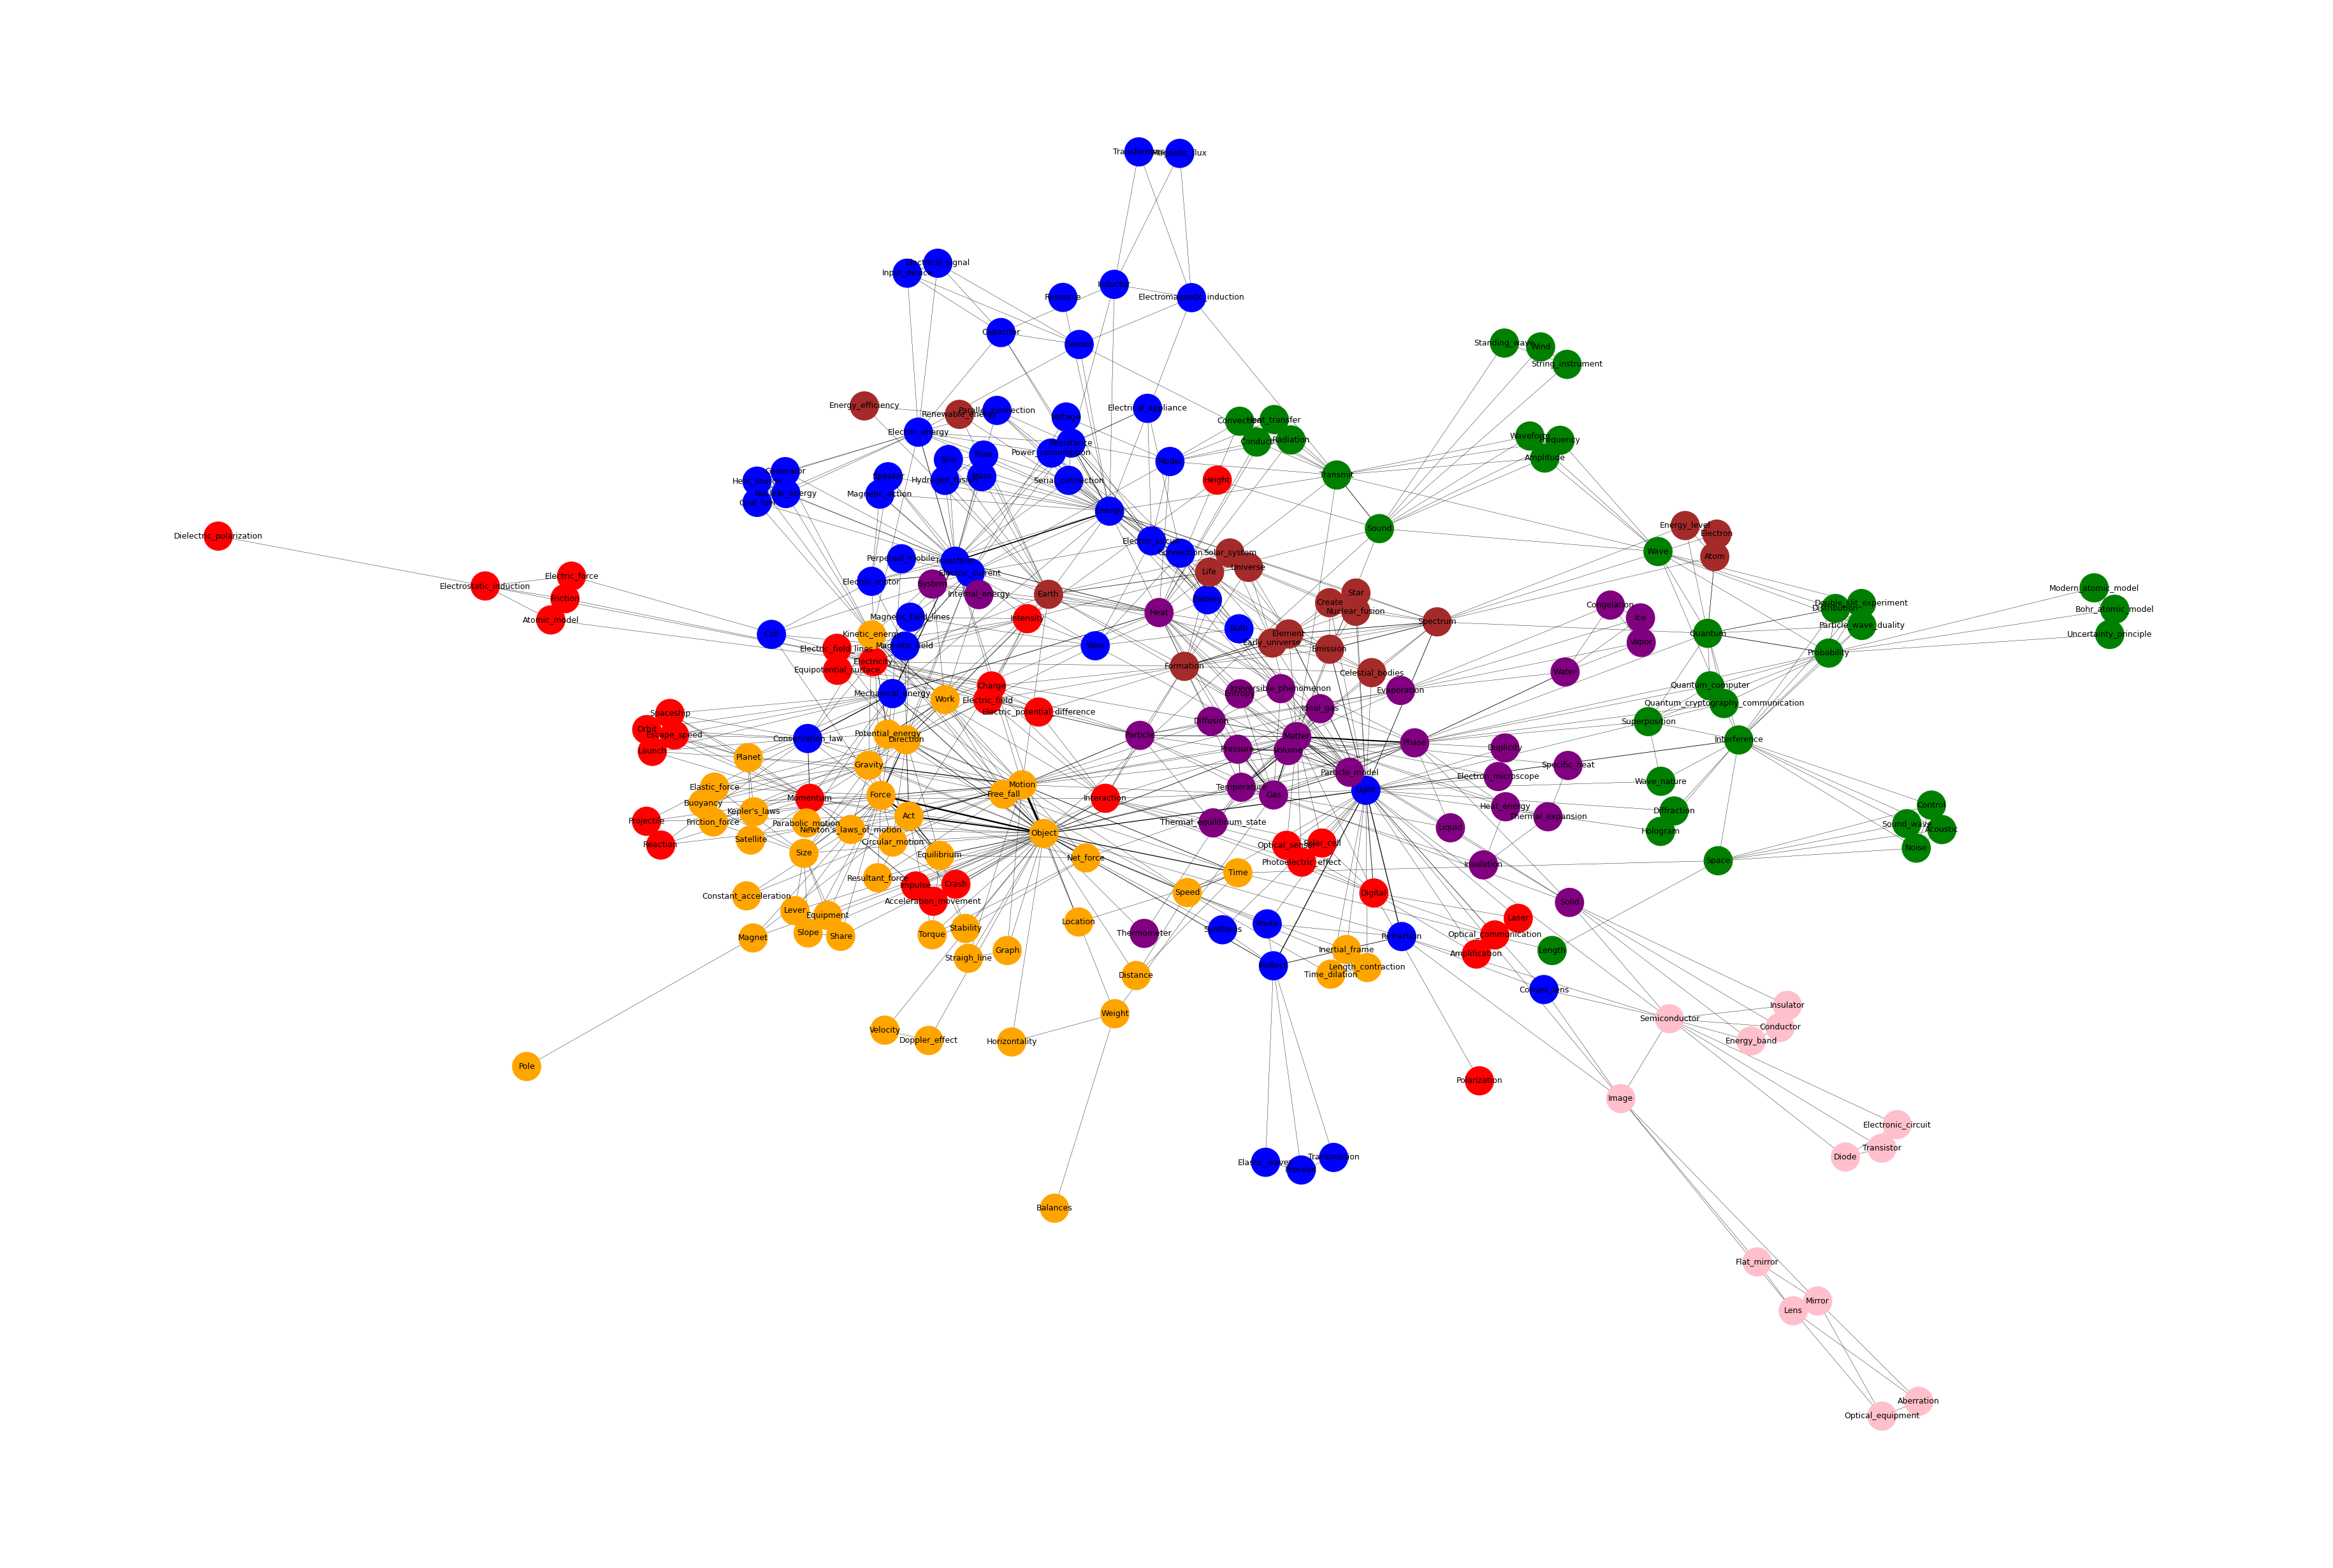

In [27]:
# 커뮤니티별로 색상 지정
colors = itertools.cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])  # 필요한 색상 리스트

node_colors = {}
for community, color in zip(communities_giant, colors):
    for node in community:
        node_colors[node] = color

# 노드 색상 리스트 생성
node_color_list = [node_colors[node] for node in G_giant.nodes()]

# 그래프 레이아웃 설정
pos = nx.fruchterman_reingold_layout(G_giant, k=1, iterations=1000, weight='weight')  # 그래프의 노드 위치 결정

edge_weights = {(u, v): data['weight'] for u, v, data in G_giant.edges(data=True)}
edge_width = [edge_weights[edge] * 0.1 for edge in G_giant.edges()]

# 그래프 시각화
plt.figure(figsize=(12,8), dpi=300)
nx.draw(G_giant, pos, with_labels=True, node_color=node_color_list, width=edge_width, node_size=100, font_size=3)
plt.show()

## 커뮤니티 간 최단거리

In [28]:
sum_matrix = np.zeros((7,7))

for i in range(7):
    for j in range(7):
        sum_comp = []
        for x in range(len(list(communities_giant[i]))):
            for y in range(len(list(communities_giant[j]))):
                s = list(communities_giant[i])[x]
                t = list(communities_giant[j])[y]
                sum_comp.append(nx.shortest_path_length(G_giant, source=s, target=t))
        sum_matrix[i][j] = np.average(sum_comp)

lst = []
for idx, data in enumerate(sum_matrix):
    # 제외할 인덱스
    index_to_exclude = idx
    # 새로운 리스트 생성 (index_to_exclude 인덱스를 제외한 리스트)
    filtered_data = [value for i, value in enumerate(data) if i != index_to_exclude]
    print(np.average(filtered_data))
    lst.append(np.average(filtered_data))

3.3047137417204113
3.2521607632740945
3.5045989763016707
3.386801946484651
3.1835904198635974
3.0902208675492986
3.9352537233771243


Text(0, 0.5, 'Average shortest path length')

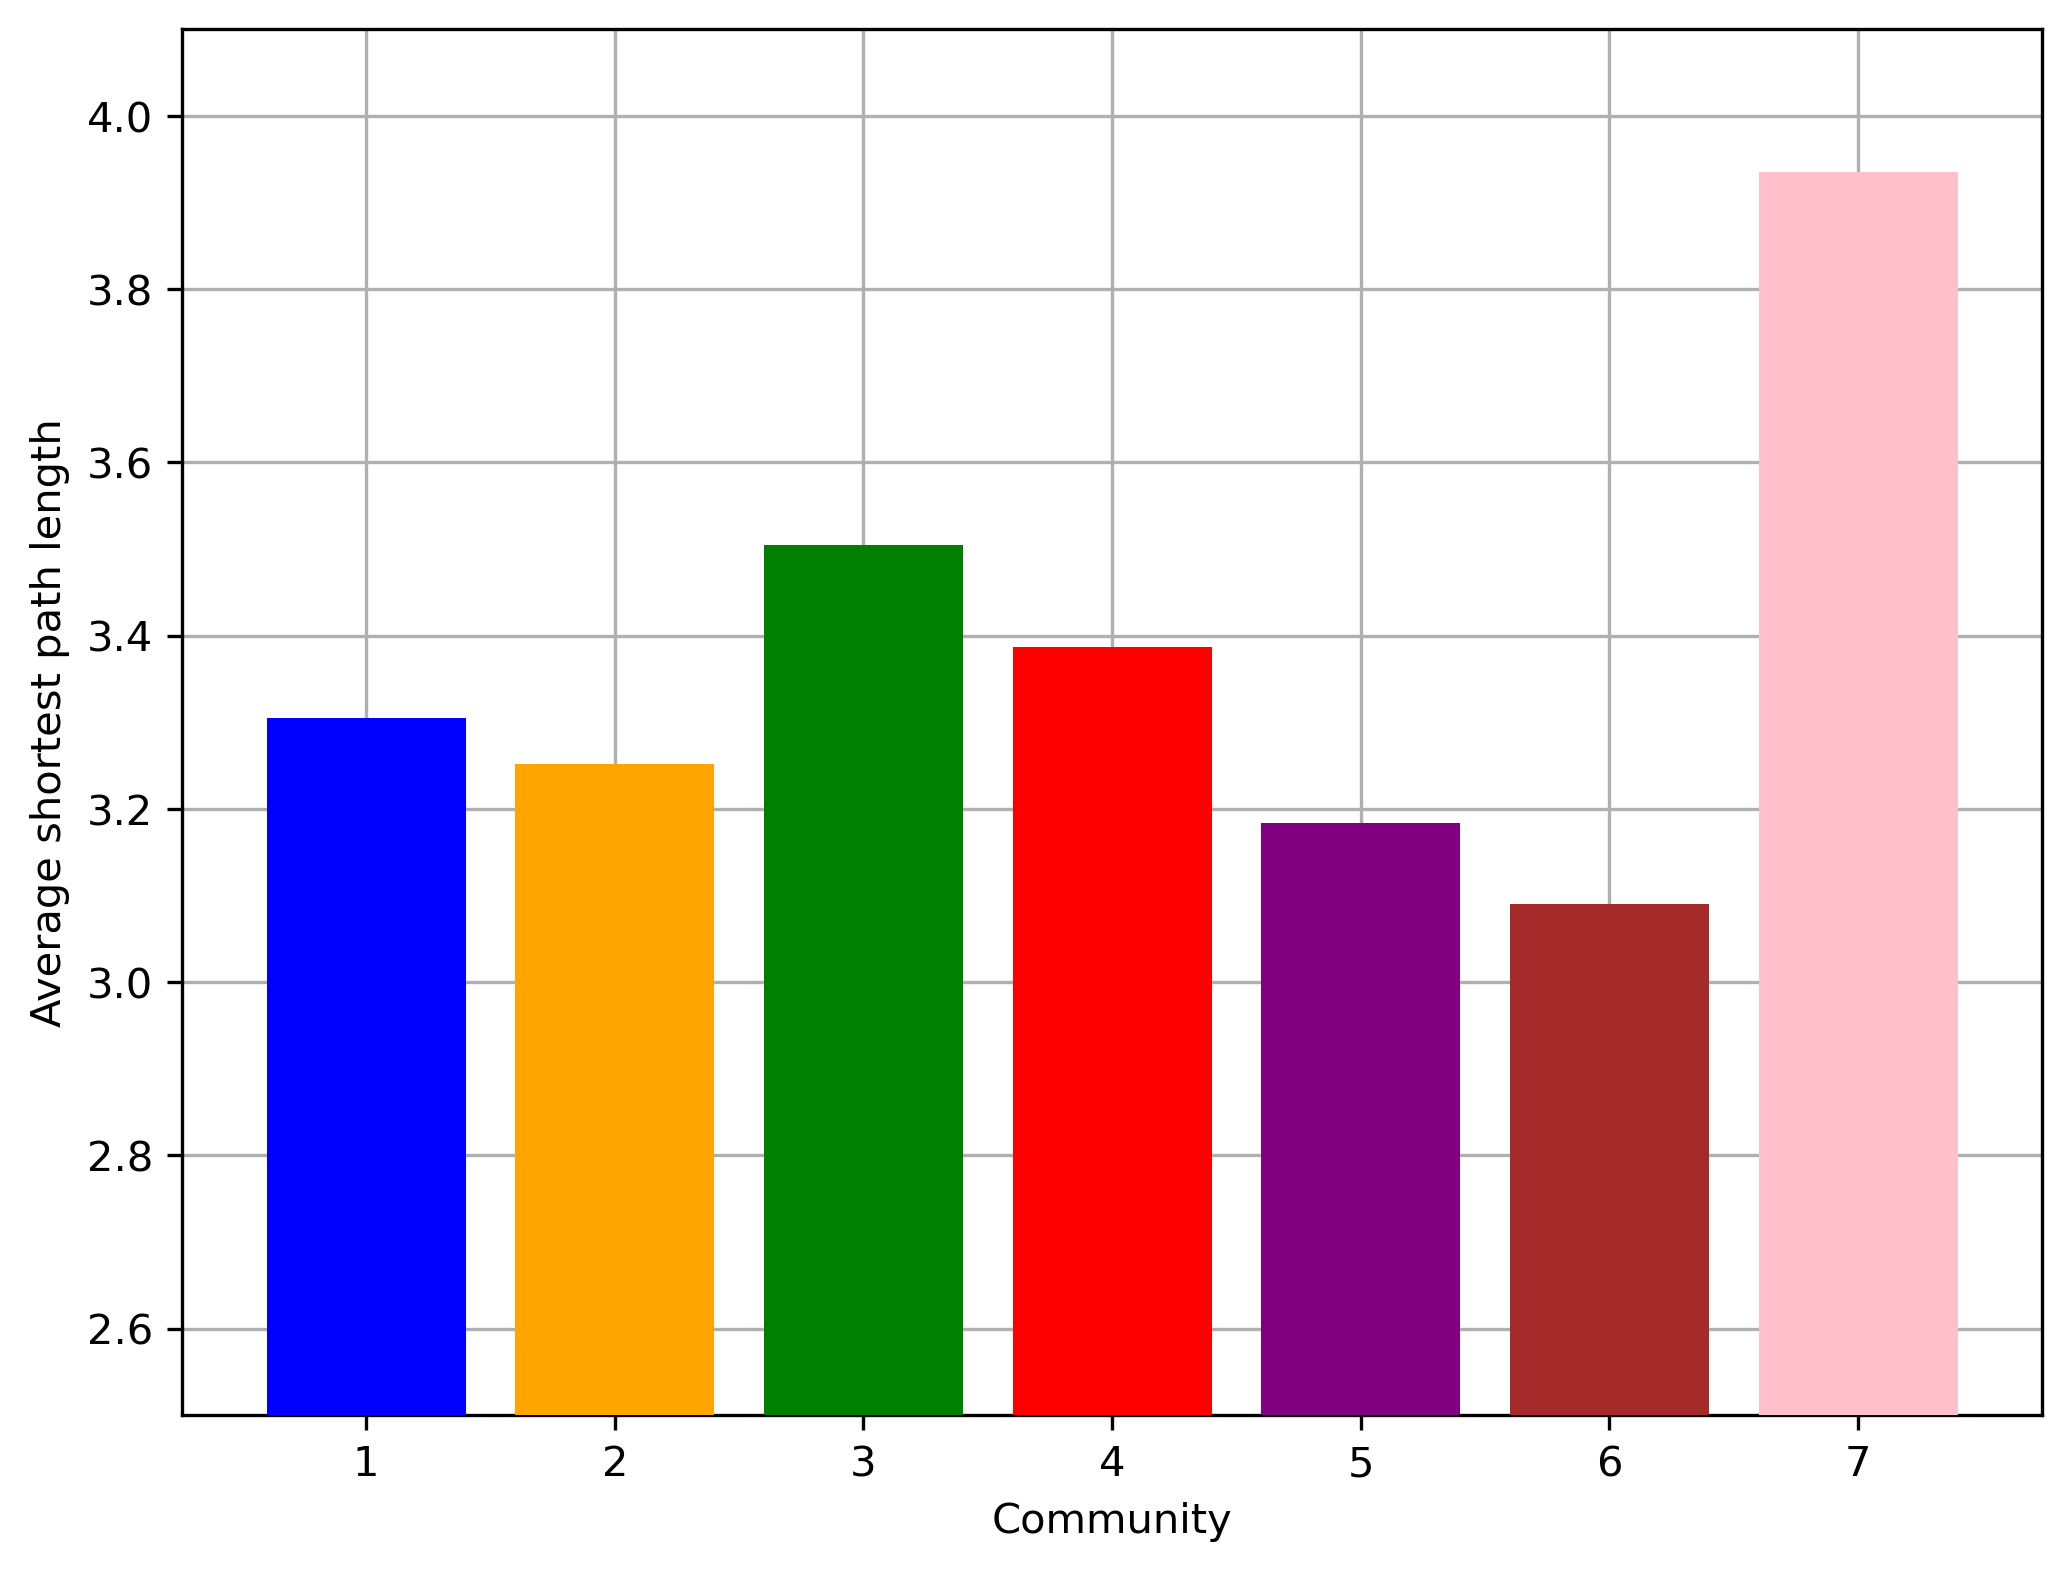

In [29]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# 그리드를 그리기 (zorder를 낮게 설정)
ax.grid(True, zorder=0)

# 막대 그래프 그리기 (zorder를 높게 설정)
x_labels = range(1, 8)
ax.bar(x_labels, lst, color=colors, zorder=3)
ax.set_xticks(x_labels)
ax.set_ylim(2.5, 4.1)

plt.xlabel('Community')
plt.ylabel('Average shortest path length')

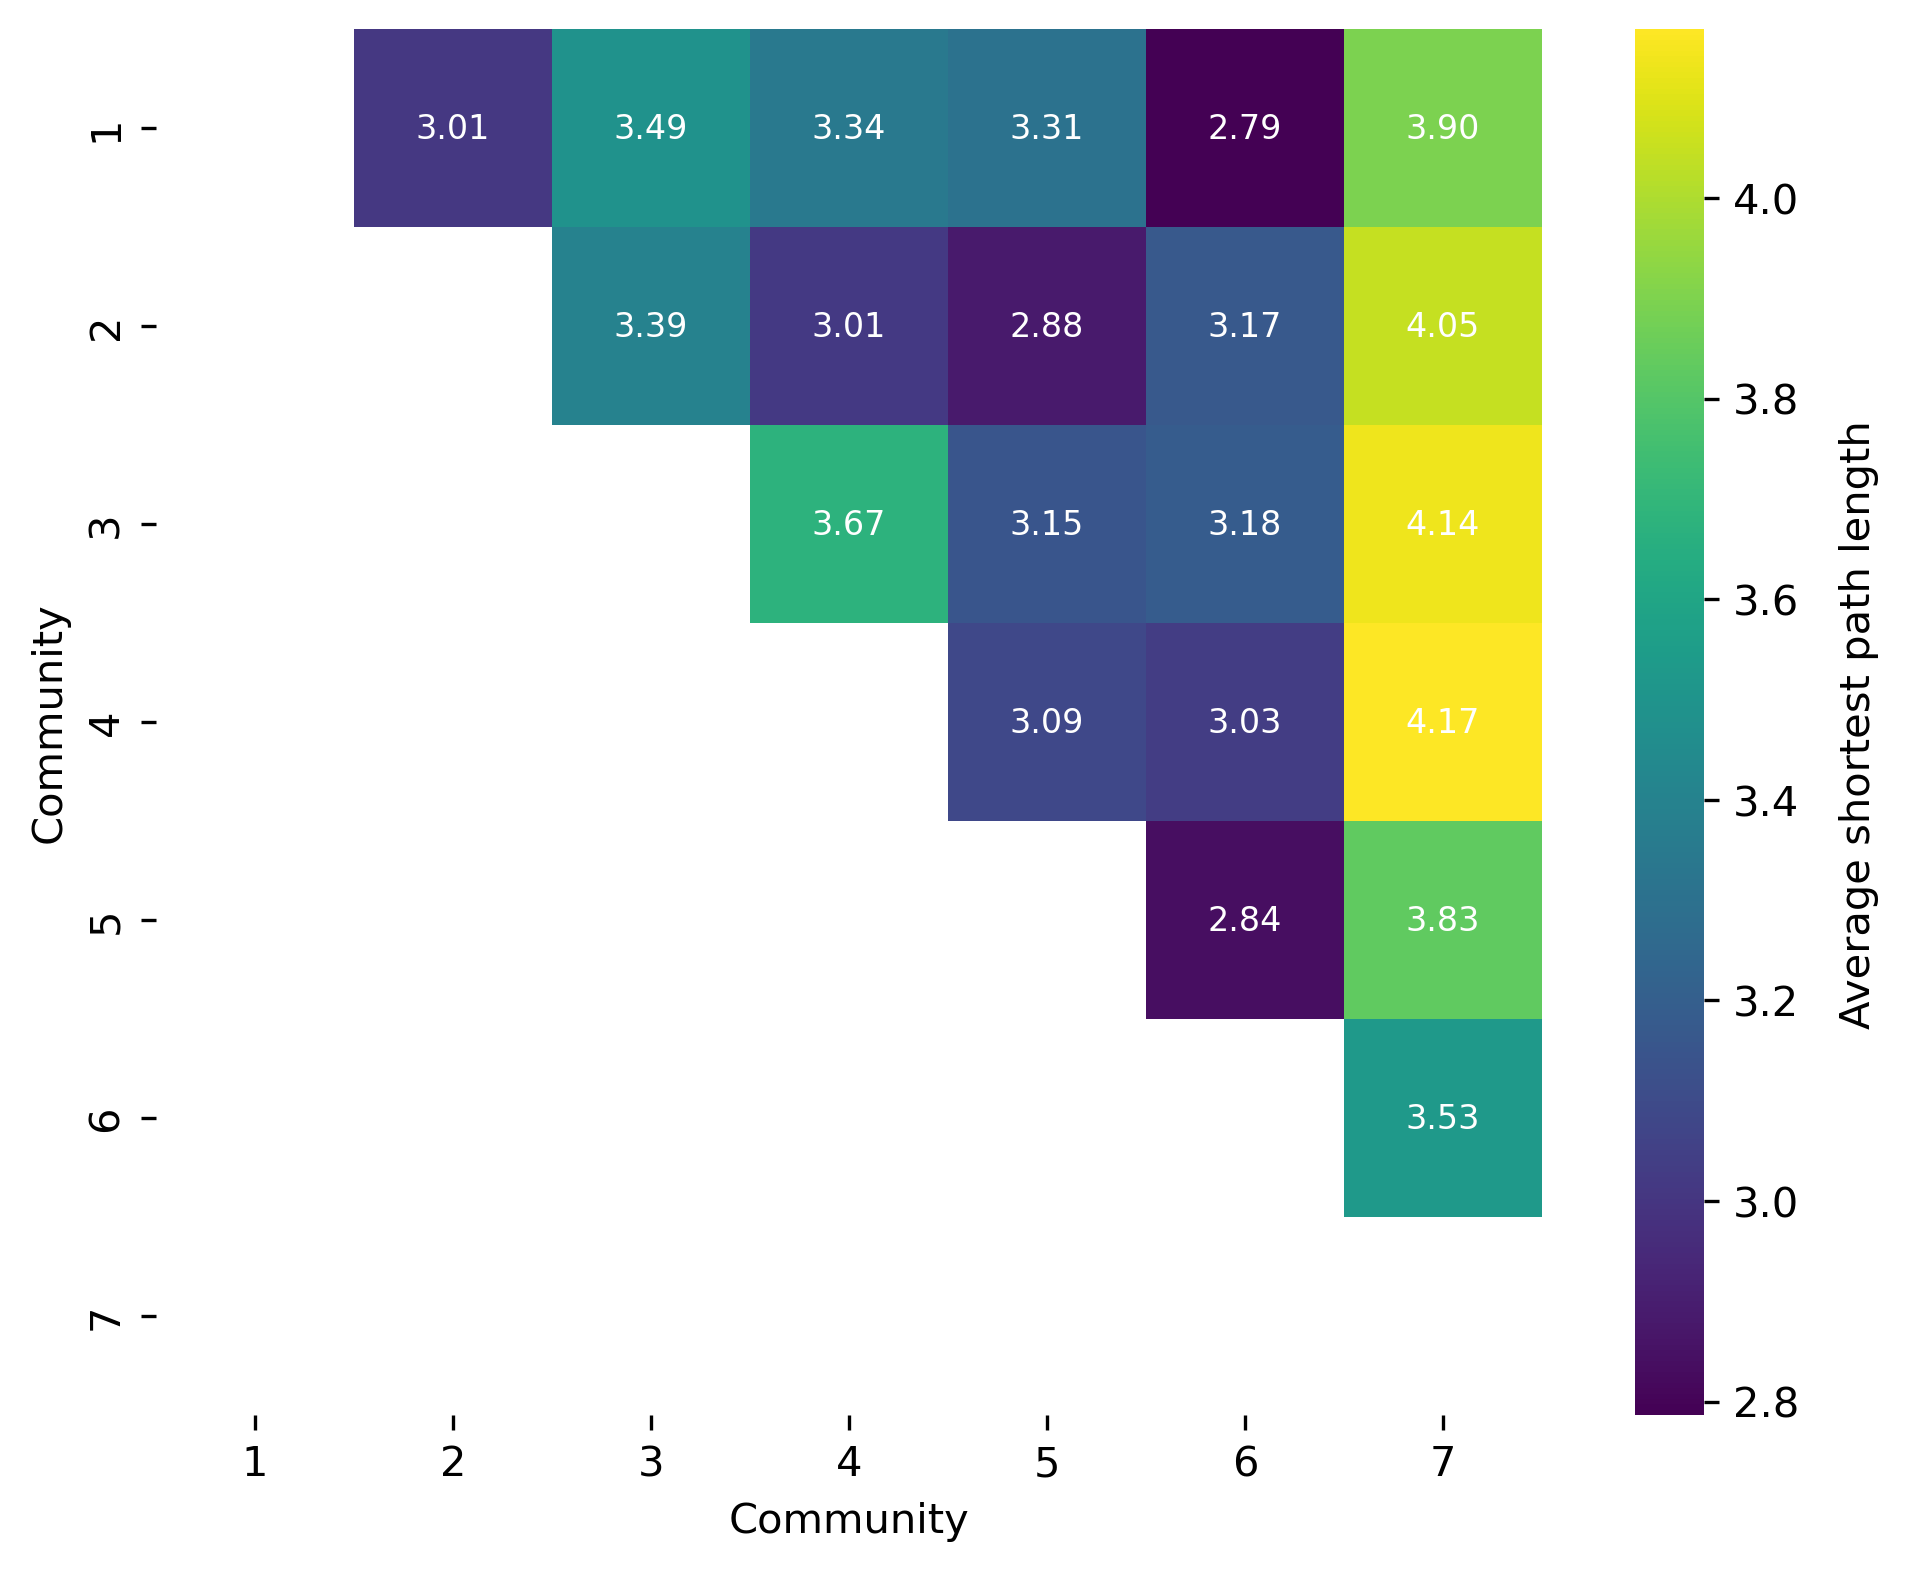

In [30]:
matrix = sum_matrix

# 좌하단 삼각형 부분만 남기고 나머지는 NaN으로 설정
mask = np.tri(*matrix.shape, k=-1).T
masked_matrix = np.where(mask, matrix, np.nan)
labels = np.arange(1, 8)

# 히트맵 그리기
plt.figure(figsize=(8, 6), dpi=300)
heatmap = sns.heatmap(masked_matrix, annot=False, fmt=".2f", cmap="viridis", cbar=True, square=True, xticklabels=labels, yticklabels=labels)

for i in range(masked_matrix.shape[0]):
    for j in range(masked_matrix.shape[1]):
        if not np.isnan(masked_matrix[i, j]):
            heatmap.text(j + 0.5, i + 0.5, f'{masked_matrix[i, j]:.2f}', 
                         ha='center', va='center', fontsize=8, color='white')

plt.xlabel('Community')
plt.ylabel('Community')

plt.text(8.5,5.0,'Average shortest path length', rotation=90)

plt.show()

# 3. 개별 교과(목) 네트워크

## 초3-6

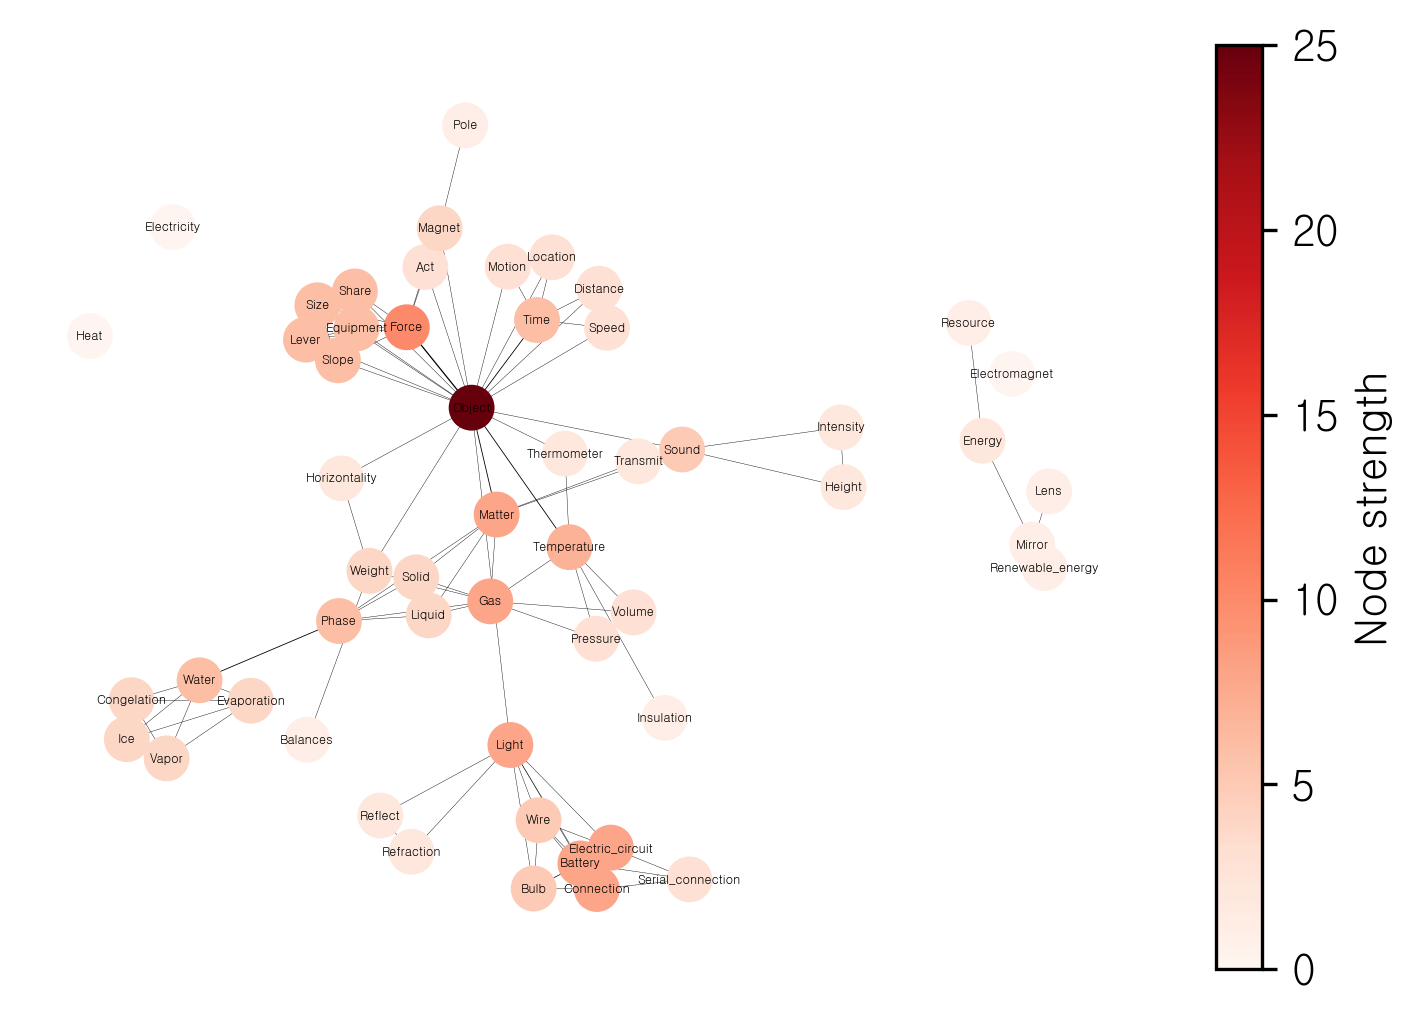

In [34]:
subject_graph(200, 1, 1.5, file_lst[0])

In [35]:
G = graph(file_lst[0])

Number of nodes: 54
Number of edges: 107
Degree avg: 3.96, Degree std: 3.06
EdgeWeight avg: 1.08, EdgeWeight std: 0.31
NodeWeight avg: 4.3, NodeWeight std: 3.76


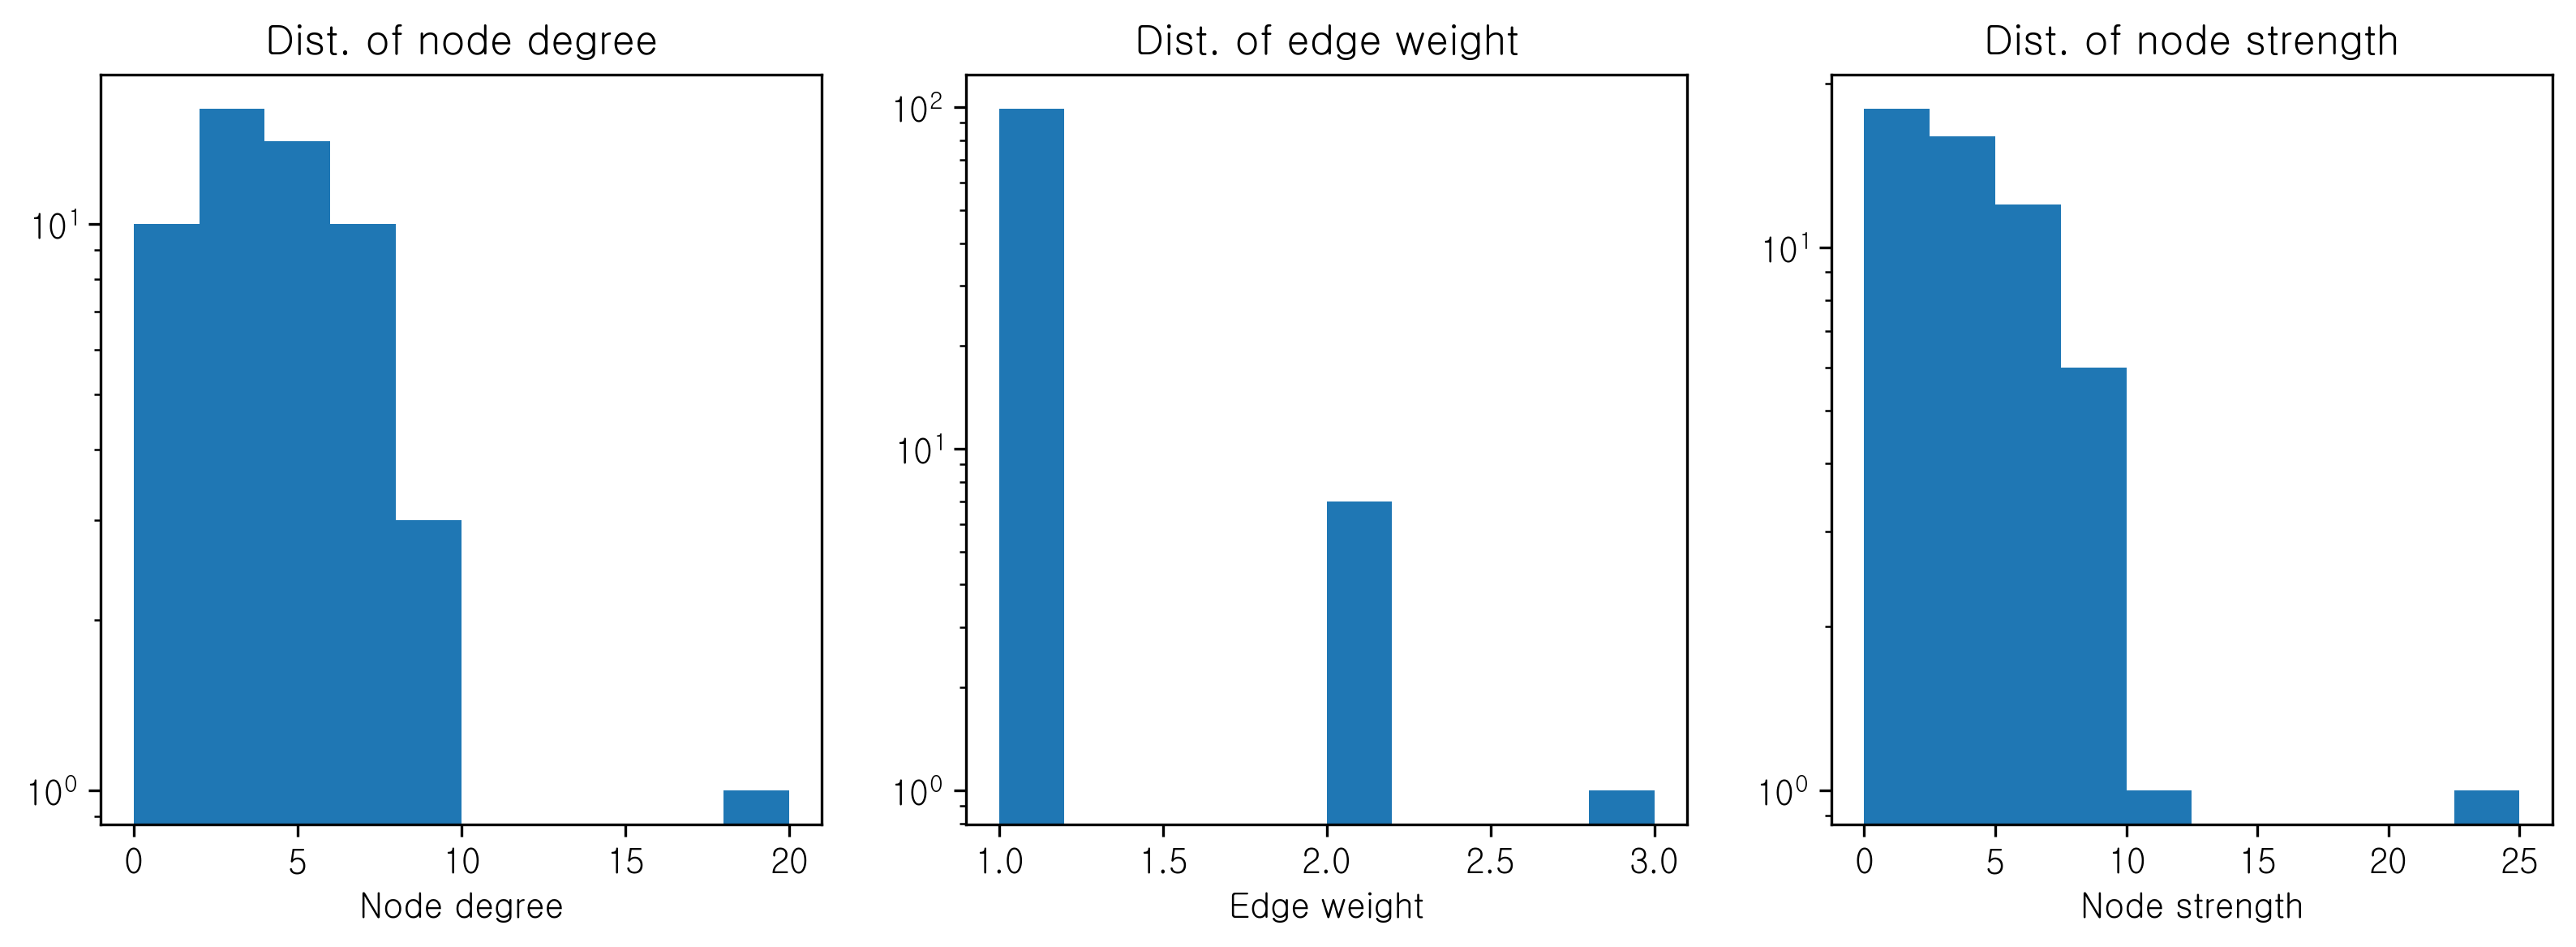

In [36]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [37]:
df = info(G)
df.head(20)

Node_ND  Node Degree                            Edge  \
0             Object         20.0                 (Force, Object)   
1              Force          8.0                (Object, Matter)   
2                Gas          8.0           (Object, Temperature)   
3              Light          8.0                  (Object, Time)   
4             Matter          7.0                  (Phase, Water)   
5              Share          6.0           (Battery, Connection)   
6               Size          6.0     (Battery, Electric_circuit)   
7              Lever          6.0  (Connection, Electric_circuit)   
8          Equipment          6.0                  (Force, Share)   
9              Slope          6.0                   (Force, Size)   
10       Temperature          6.0                  (Force, Lever)   
11           Battery          6.0              (Force, Equipment)   
12        Connection          6.0                  (Force, Slope)   
13  Electric_circuit          6.0                    (Force, Act)   
14             Phase          5.0                 (Force, Magnet)   
15             Sound          5.0         (Object, Horizontality)   
16             Water          5.0                (Object, Weight)   
17              Time          5.0                 (Object, Share)   
18              Wire          5.0                  (Object, Size)   
19              Bulb          5.0                 (Object, Lever)   

    Edge Weight           Node_NS  Node Strength           Node_BC  \
0             3            Object           25.0            Object   
1             2             Force           10.0             Light   
2             2            Matter            8.0            Matter   
3             2               Gas            8.0               Gas   
4             2             Light            8.0             Phase   
5             2           Battery            8.0       Temperature   
6             2        Connection            8.0             Water   
7             2  Electric_circuit            8.0             Sound   
8             1       Temperature            7.0            Weight   
9             1             Share            6.0             Force   
10            1              Size            6.0            Liquid   
11            1             Lever            6.0             Solid   
12            1         Equipment            6.0            Magnet   
13            1             Slope            6.0              Time   
14            1             Phase            6.0        Connection   
15            1             Water            6.0  Electric_circuit   
16            1              Time            6.0           Battery   
17            1             Sound            5.0            Volume   
18            1              Wire            5.0          Pressure   
19            1              Bulb            5.0     Horizontality   

    Betweenness Centrality  
0                 0.788332  
1                 0.313468  
2                 0.295373  
3                 0.255961  
4                 0.236754  
5                 0.206567  
6                 0.166869  
7                 0.154425  
8                 0.125433  
9                 0.114458  
10                0.074128  
11                0.074128  
12                0.065559  
13                0.064646  
14                0.048384  
15                0.048384  
16                0.048384  
17                0.046448  
18                0.046448  
19                0.039319

## 중1-3

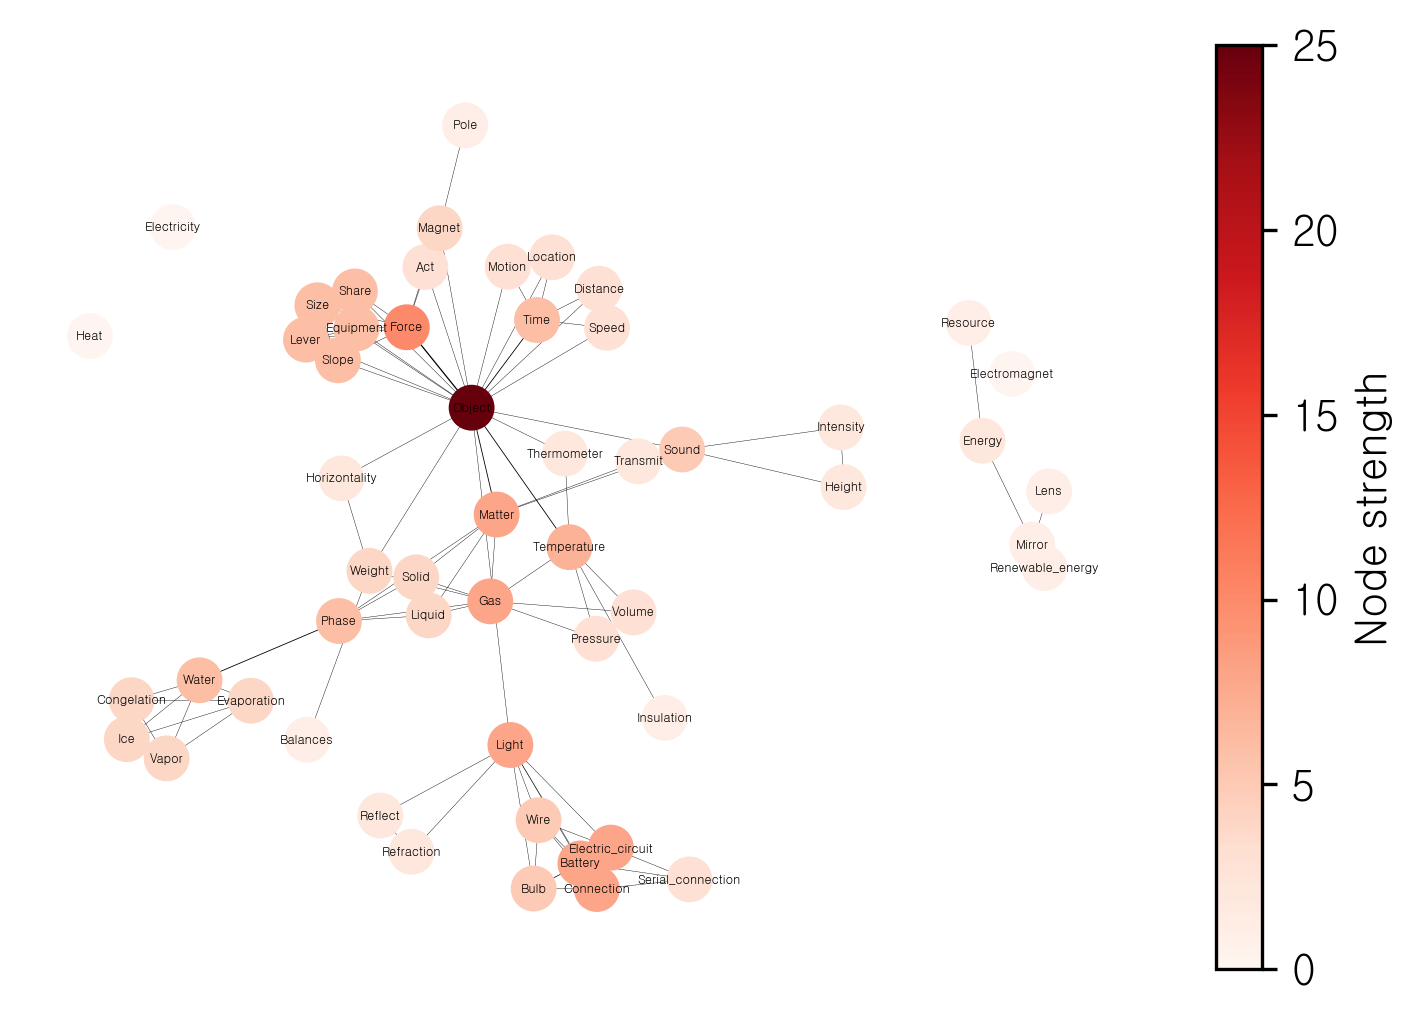

In [38]:
subject_graph(200, 1, 1.5, file_lst[0])

In [39]:
G = graph(file_lst[0])

Number of nodes: 54
Number of edges: 107
Degree avg: 3.96, Degree std: 3.06
EdgeWeight avg: 1.08, EdgeWeight std: 0.31
NodeWeight avg: 4.3, NodeWeight std: 3.76


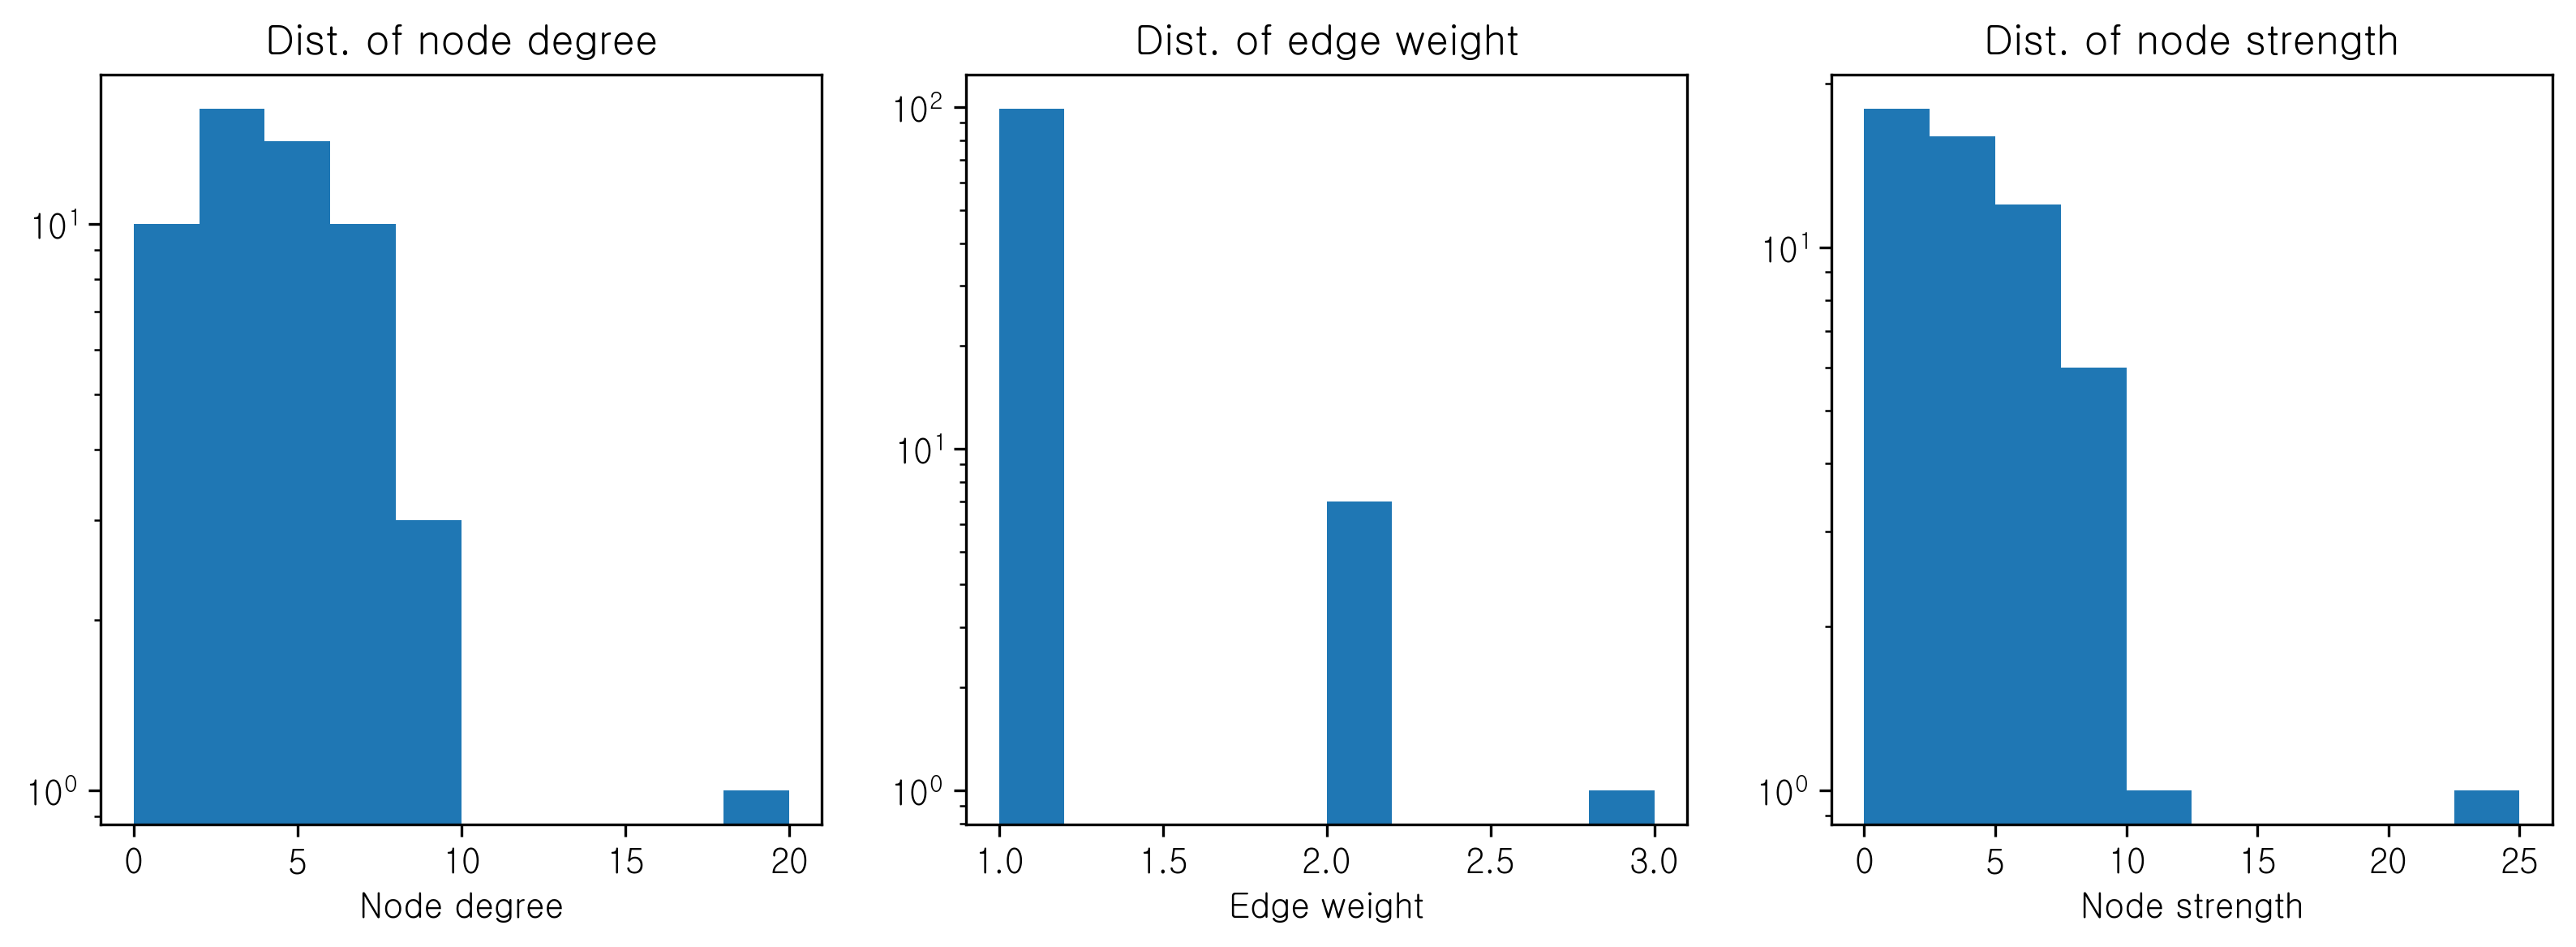

In [40]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [41]:
df = info(G)
df.head(20)

Node_ND  Node Degree                            Edge  \
0             Object         20.0                 (Force, Object)   
1              Force          8.0                (Object, Matter)   
2                Gas          8.0           (Object, Temperature)   
3              Light          8.0                  (Object, Time)   
4             Matter          7.0                  (Phase, Water)   
5              Share          6.0           (Battery, Connection)   
6               Size          6.0     (Battery, Electric_circuit)   
7              Lever          6.0  (Connection, Electric_circuit)   
8          Equipment          6.0                  (Force, Share)   
9              Slope          6.0                   (Force, Size)   
10       Temperature          6.0                  (Force, Lever)   
11           Battery          6.0              (Force, Equipment)   
12        Connection          6.0                  (Force, Slope)   
13  Electric_circuit          6.0                    (Force, Act)   
14             Phase          5.0                 (Force, Magnet)   
15             Sound          5.0         (Object, Horizontality)   
16             Water          5.0                (Object, Weight)   
17              Time          5.0                 (Object, Share)   
18              Wire          5.0                  (Object, Size)   
19              Bulb          5.0                 (Object, Lever)   

    Edge Weight           Node_NS  Node Strength           Node_BC  \
0             3            Object           25.0            Object   
1             2             Force           10.0             Light   
2             2            Matter            8.0            Matter   
3             2               Gas            8.0               Gas   
4             2             Light            8.0             Phase   
5             2           Battery            8.0       Temperature   
6             2        Connection            8.0             Water   
7             2  Electric_circuit            8.0             Sound   
8             1       Temperature            7.0            Weight   
9             1             Share            6.0             Force   
10            1              Size            6.0            Liquid   
11            1             Lever            6.0             Solid   
12            1         Equipment            6.0            Magnet   
13            1             Slope            6.0              Time   
14            1             Phase            6.0        Connection   
15            1             Water            6.0  Electric_circuit   
16            1              Time            6.0           Battery   
17            1             Sound            5.0            Volume   
18            1              Wire            5.0          Pressure   
19            1              Bulb            5.0     Horizontality   

    Betweenness Centrality  
0                 0.788332  
1                 0.313468  
2                 0.295373  
3                 0.255961  
4                 0.236754  
5                 0.206567  
6                 0.166869  
7                 0.154425  
8                 0.125433  
9                 0.114458  
10                0.074128  
11                0.074128  
12                0.065559  
13                0.064646  
14                0.048384  
15                0.048384  
16                0.048384  
17                0.046448  
18                0.046448  
19                0.039319

## 통합과학

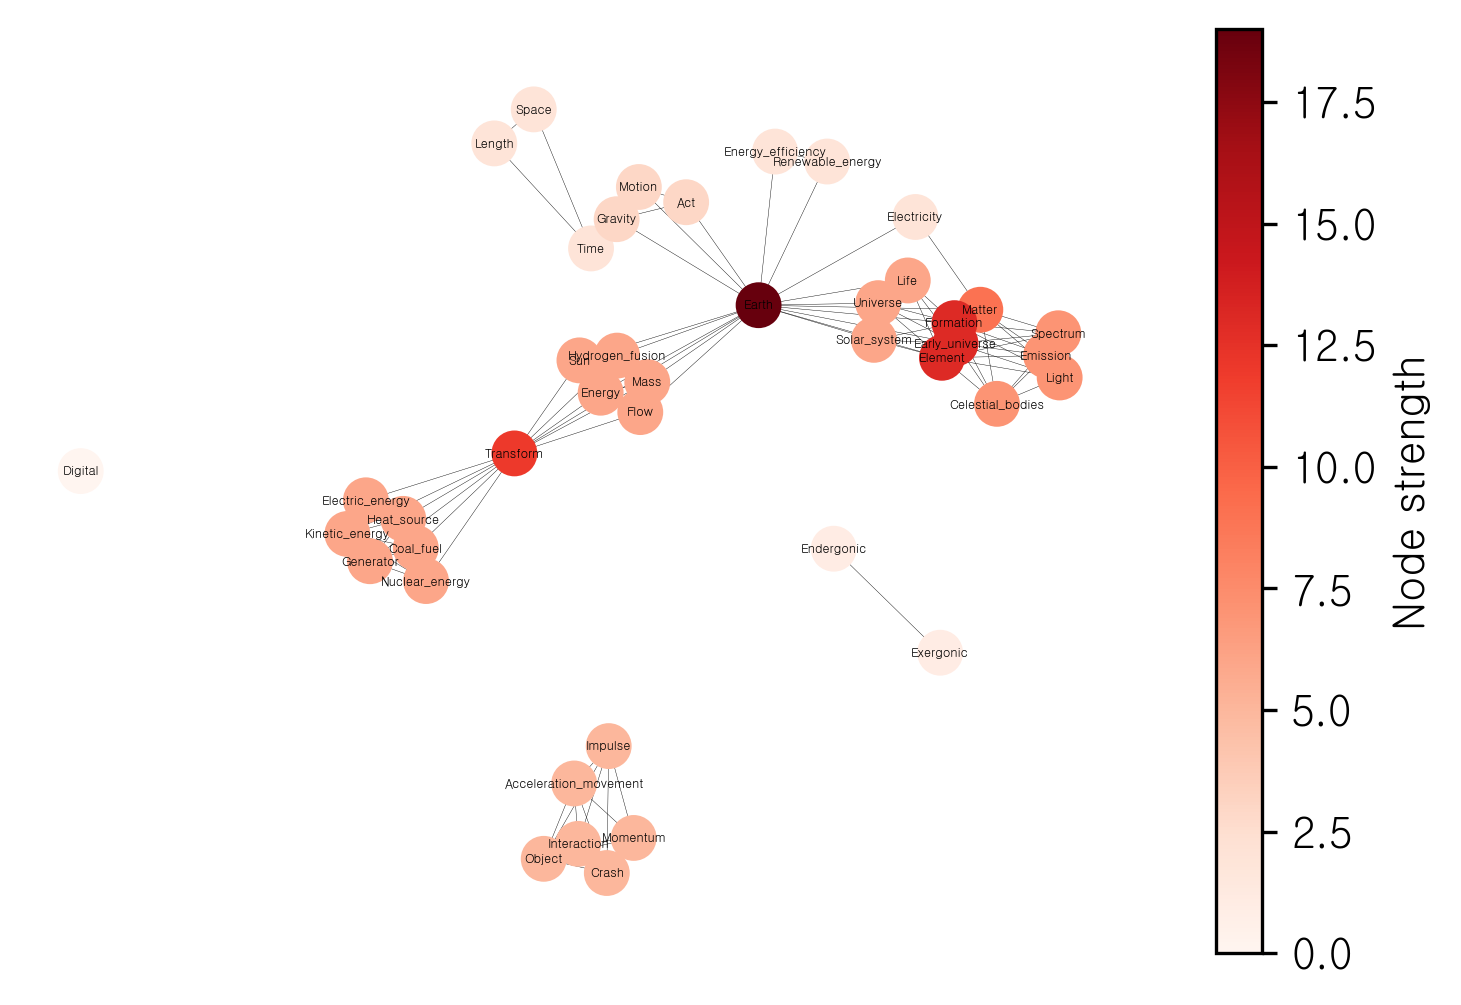

In [42]:
subject_graph(220,51, 1.5, file_lst[2])

In [43]:
G = graph(file_lst[2])

Number of nodes: 42
Number of edges: 119
Degree avg: 5.67, Degree std: 3.46
EdgeWeight avg: 1.03, EdgeWeight std: 0.16
NodeWeight avg: 5.81, NodeWeight std: 3.71


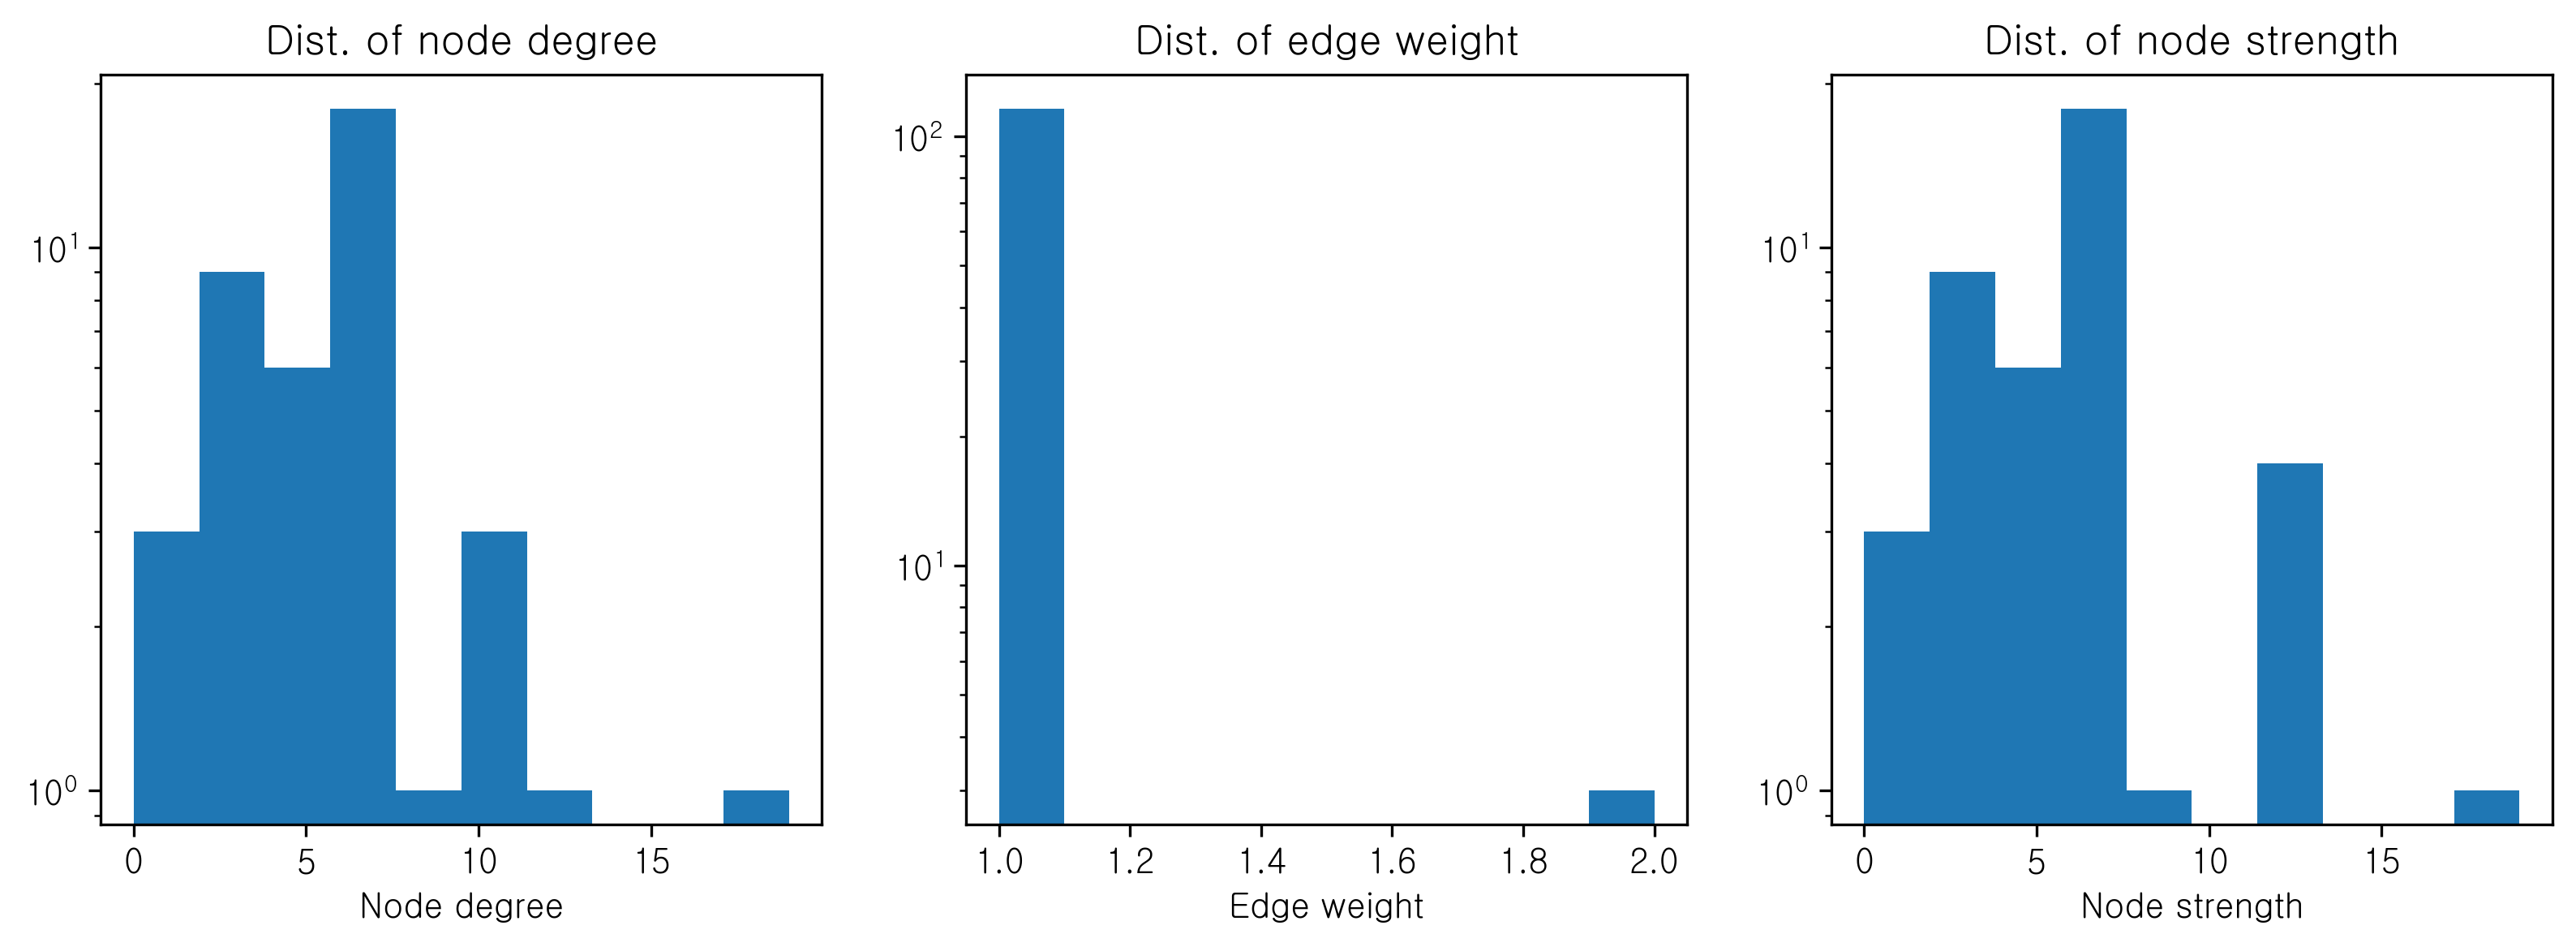

In [44]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [45]:
df = info(G)
df.head(20)

Node_ND  Node Degree                                Edge  \
0              Earth         19.0           (Early_universe, Element)   
1          Transform         12.0         (Early_universe, Formation)   
2     Early_universe         11.0                (Element, Formation)   
3            Element         11.0                      (Time, Length)   
4          Formation         11.0                       (Time, Space)   
5             Matter          9.0                     (Length, Space)   
6           Spectrum          7.0          (Spectrum, Early_universe)   
7   Celestial_bodies          7.0                  (Spectrum, Matter)   
8              Light          7.0                 (Spectrum, Element)   
9           Emission          7.0               (Spectrum, Formation)   
10          Universe          6.0        (Spectrum, Celestial_bodies)   
11              Life          6.0                   (Spectrum, Light)   
12      Solar_system          6.0                (Spectrum, Emission)   
13              Mass          6.0            (Early_universe, Matter)   
14   Hydrogen_fusion          6.0  (Early_universe, Celestial_bodies)   
15              Flow          6.0             (Early_universe, Light)   
16               Sun          6.0          (Early_universe, Emission)   
17            Energy          6.0          (Early_universe, Universe)   
18         Generator          6.0              (Early_universe, Life)   
19    Kinetic_energy          6.0             (Early_universe, Earth)   

    Edge Weight           Node_NS  Node Strength          Node_BC  \
0             2             Earth           19.0            Earth   
1             2    Early_universe           13.0        Transform   
2             2           Element           13.0           Matter   
3             1         Formation           13.0   Early_universe   
4             1         Transform           12.0          Element   
5             1            Matter            9.0        Formation   
6             1          Spectrum            7.0  Hydrogen_fusion   
7             1  Celestial_bodies            7.0             Flow   
8             1             Light            7.0              Sun   
9             1          Emission            7.0           Energy   
10            1          Universe            6.0             Mass   
11            1              Life            6.0     Solar_system   
12            1      Solar_system            6.0             Life   
13            1              Mass            6.0         Universe   
14            1   Hydrogen_fusion            6.0        Generator   
15            1              Flow            6.0   Kinetic_energy   
16            1               Sun            6.0   Nuclear_energy   
17            1            Energy            6.0        Coal_fuel   
18            1         Generator            6.0      Heat_source   
19            1    Kinetic_energy            6.0  Electric_energy   

    Betweenness Centrality  
0                 0.713654  
1                 0.380366  
2                 0.131289  
3                 0.127176  
4                 0.127176  
5                 0.127176  
6                 0.081633  
7                 0.081633  
8                 0.081633  
9                 0.081633  
10                0.081633  
11                0.064276  
12                0.064276  
13                0.064276  
14                0.045742  
15                0.045742  
16                0.045742  
17                0.045742  
18                0.045742  
19                0.045742

## 물리학

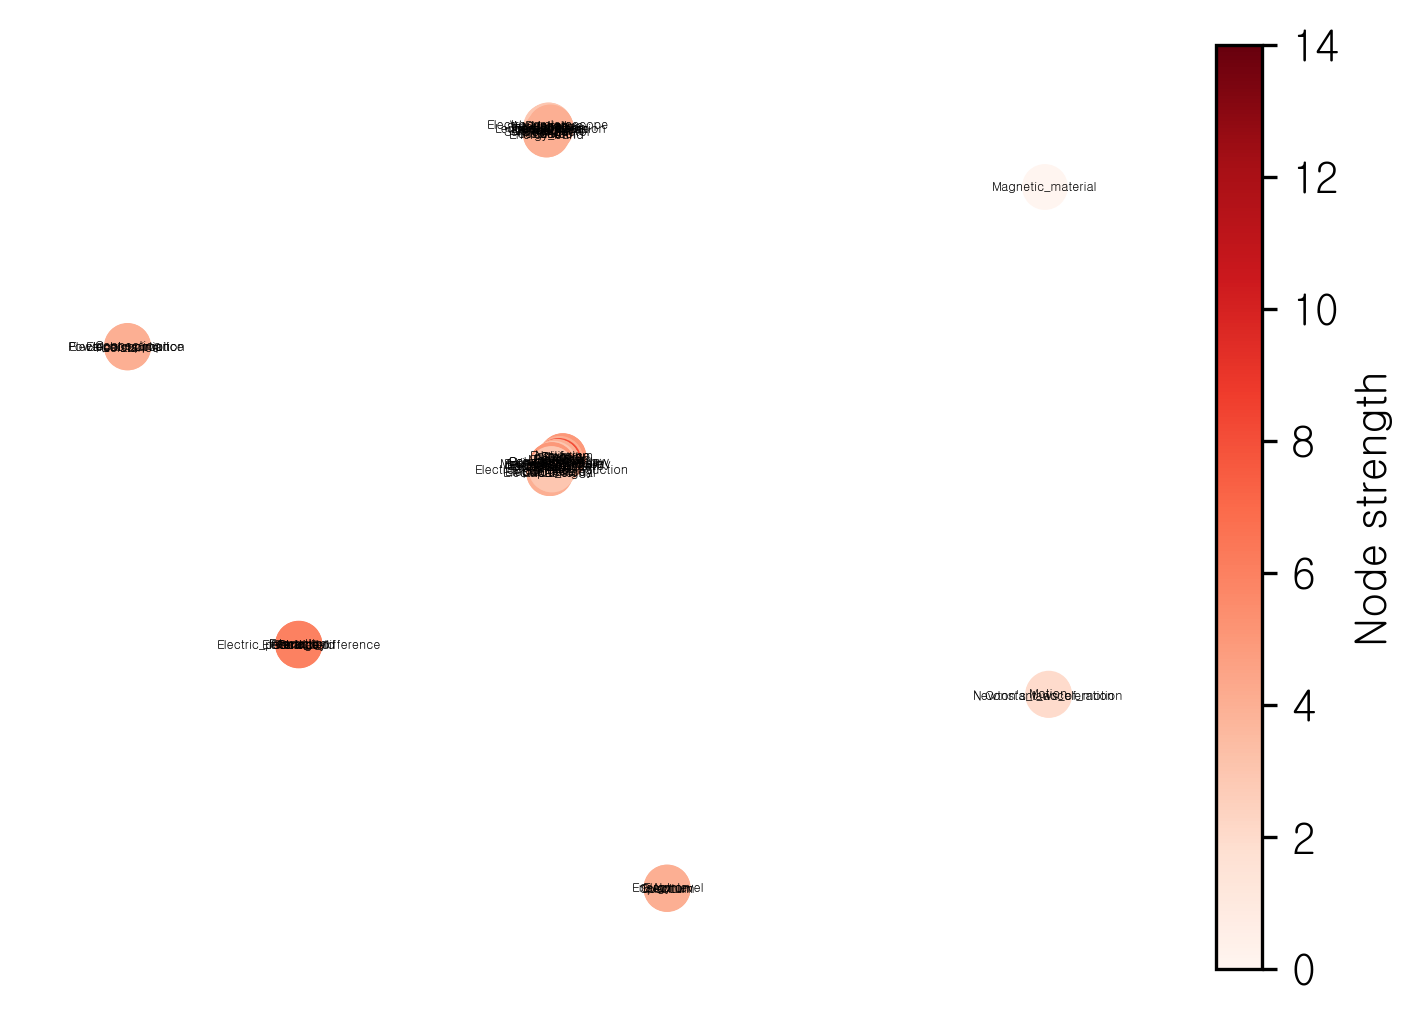

In [46]:
subject_graph(10000, 14, 1, file_lst[3])

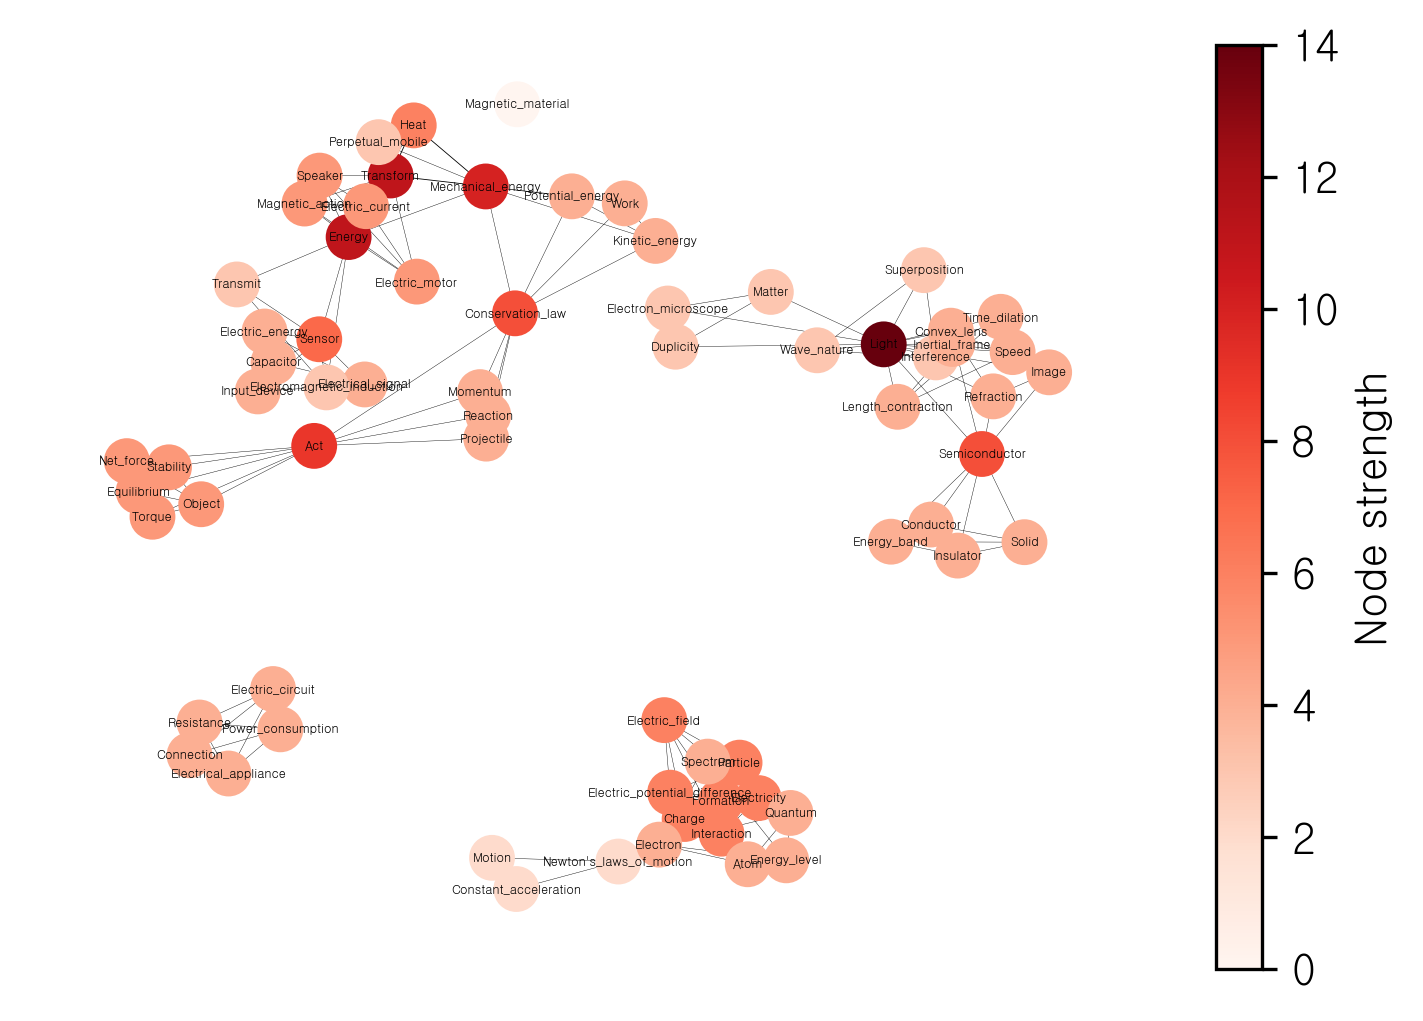

In [47]:
#(itr, seed, k, file_name)
subject_graph(220,51, 1.5, file_lst[3])

In [48]:
G = graph(file_lst[3])

Number of nodes: 69
Number of edges: 160
Degree avg: 4.64, Degree std: 2.01
EdgeWeight avg: 1.02, EdgeWeight std: 0.16
NodeWeight avg: 4.75, NodeWeight std: 2.22


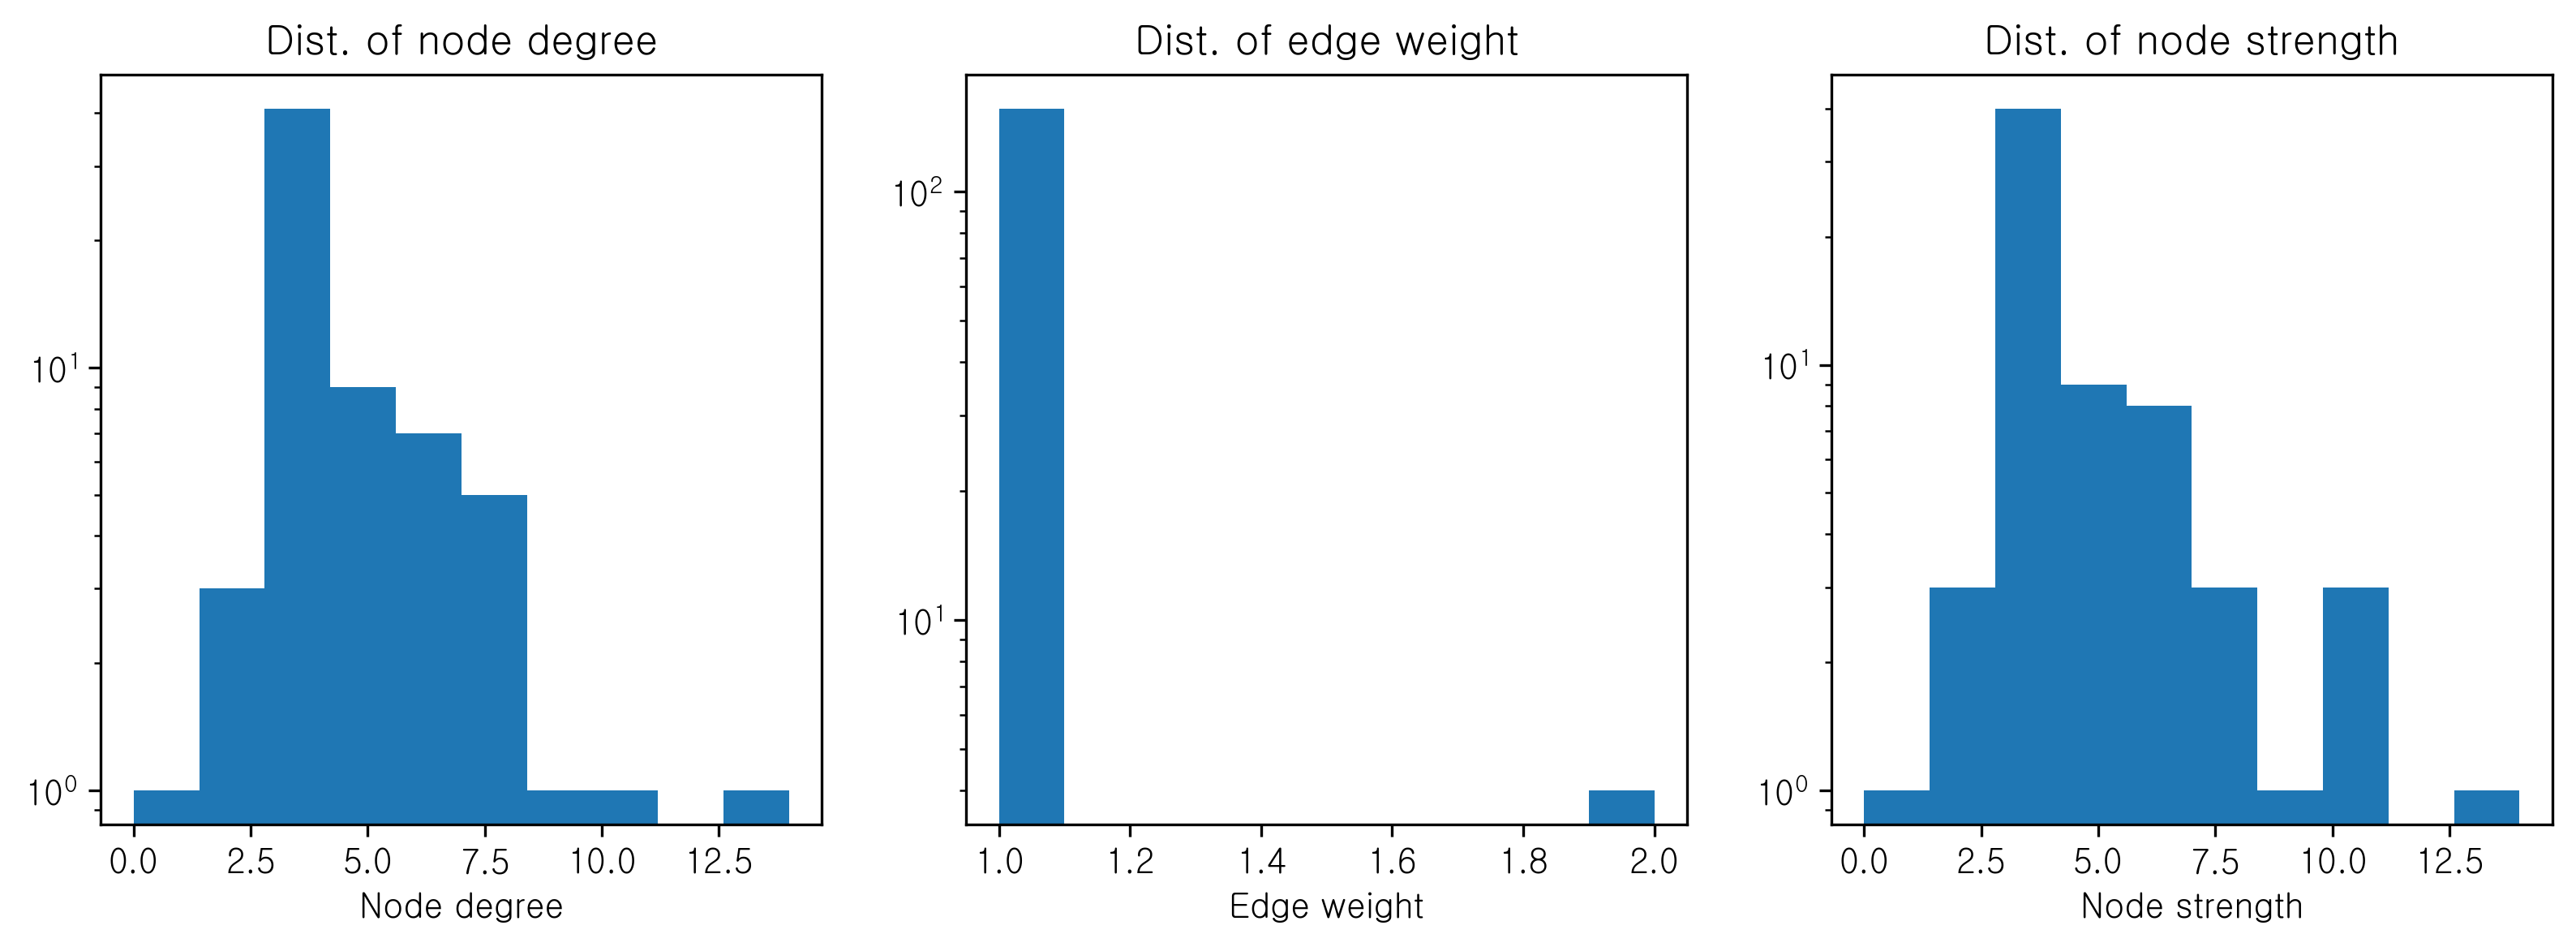

In [49]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [50]:
df = info(G)
df.head(20)

Node_ND  Node Degree  \
0                           Light         14.0   
1                          Energy         10.0   
2                             Act          9.0   
3                Conservation_law          8.0   
4               Mechanical_energy          8.0   
5                       Transform          8.0   
6                   Semiconductor          8.0   
7                          Sensor          7.0   
8                     Electricity          6.0   
9                  Electric_field          6.0   
10                      Formation          6.0   
11                    Interaction          6.0   
12                         Charge          6.0   
13                       Particle          6.0   
14  Electric_potential_difference          6.0   
15                    Equilibrium          5.0   
16                      Stability          5.0   
17                      Net_force          5.0   
18                         Object          5.0   
19                         Torque          5.0   

                              Edge  Edge Weight  \
0   (Mechanical_energy, Transform)            2   
1        (Mechanical_energy, Heat)            2   
2              (Transform, Energy)            2   
3                (Transform, Heat)            2   
4               (Act, Equilibrium)            1   
5                 (Act, Stability)            1   
6                 (Act, Net_force)            1   
7                    (Act, Object)            1   
8                    (Act, Torque)            1   
9                (Act, Projectile)            1   
10                 (Act, Momentum)            1   
11                 (Act, Reaction)            1   
12         (Act, Conservation_law)            1   
13        (Equilibrium, Stability)            1   
14        (Equilibrium, Net_force)            1   
15           (Equilibrium, Object)            1   
16           (Equilibrium, Torque)            1   
17          (Stability, Net_force)            1   
18             (Stability, Object)            1   
19             (Stability, Torque)            1   

                          Node_NS  Node Strength                    Node_BC  \
0                           Light           14.0          Mechanical_energy   
1                       Transform           11.0                     Energy   
2                          Energy           11.0           Conservation_law   
3               Mechanical_energy           10.0                        Act   
4                             Act            9.0                  Transform   
5                Conservation_law            8.0                     Sensor   
6                   Semiconductor            8.0                       Heat   
7                          Sensor            7.0           Potential_energy   
8                            Heat            6.0                       Work   
9                     Electricity            6.0             Kinetic_energy   
10                 Electric_field            6.0                   Reaction   
11                      Formation            6.0                 Projectile   
12                    Interaction            6.0                   Momentum   
13                         Charge            6.0                   Transmit   
14                       Particle            6.0  Electromagnetic_induction   
15  Electric_potential_difference            6.0           Perpetual_mobile   
16                    Equilibrium            5.0             Electric_motor   
17                      Stability            5.0                    Speaker   
18                      Net_force            5.0           Electric_current   
19                         Object            5.0            Magnetic_action   

    Betweenness Centrality  
0                 0.563022  
1                 0.491653  
2                 0.490476  
3                 0.341975  
4                 0.338539  
5                 0.286905  
6                 0.160886  
7          

## 역학과 에너지

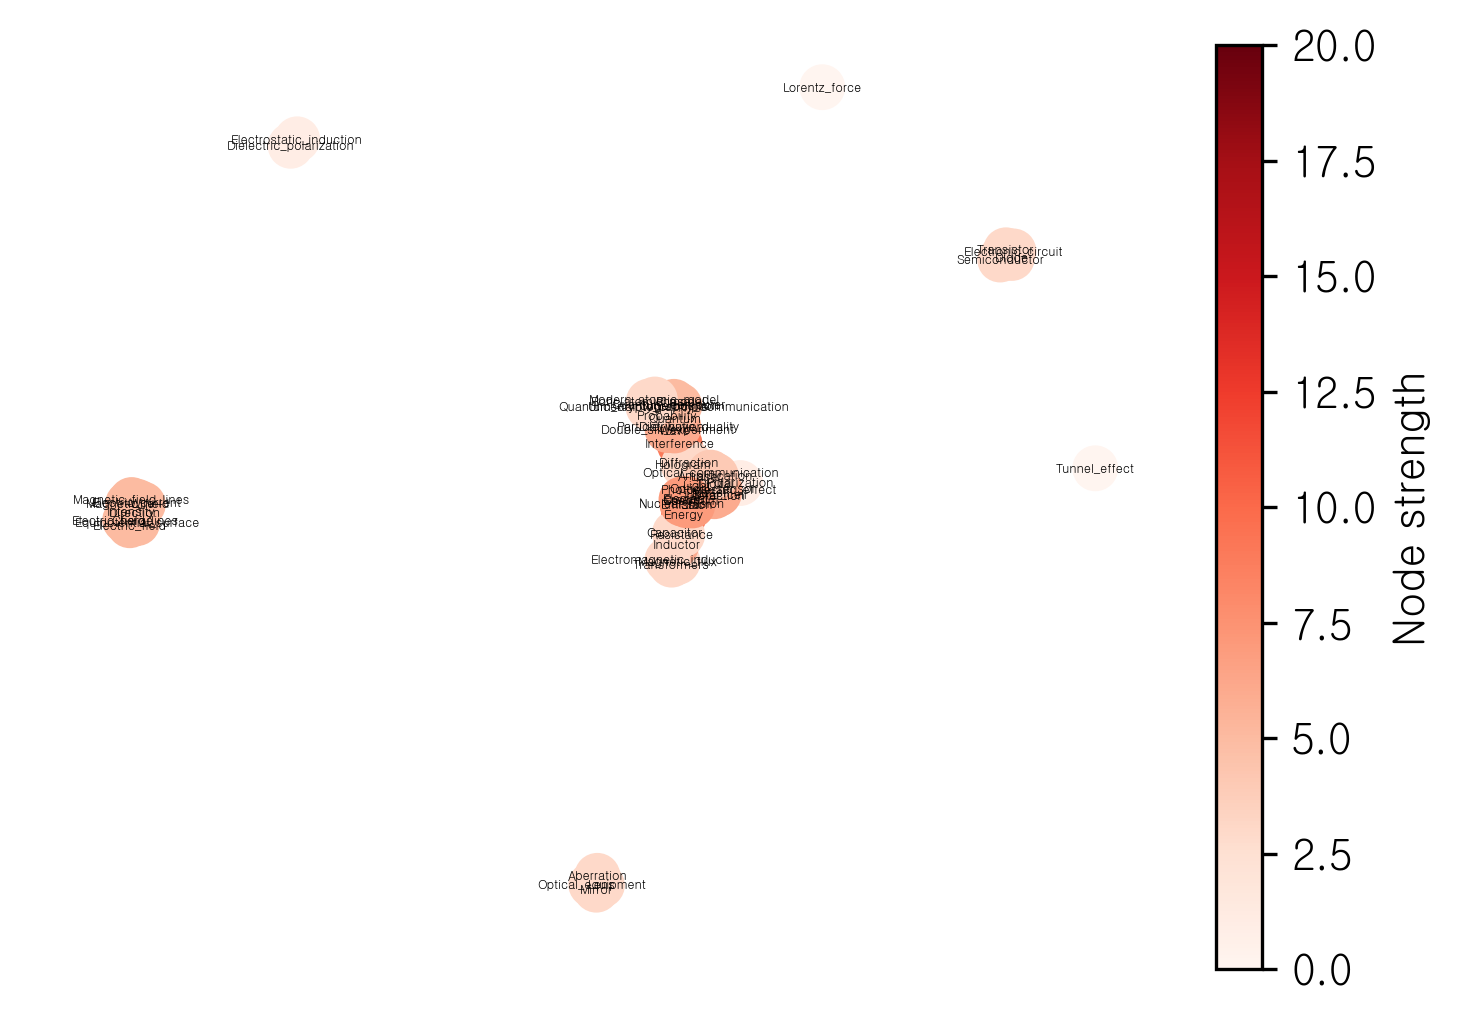

In [51]:
#(itr, seed, k, file_name)
subject_graph(1000, 1, 1, file_lst[5])

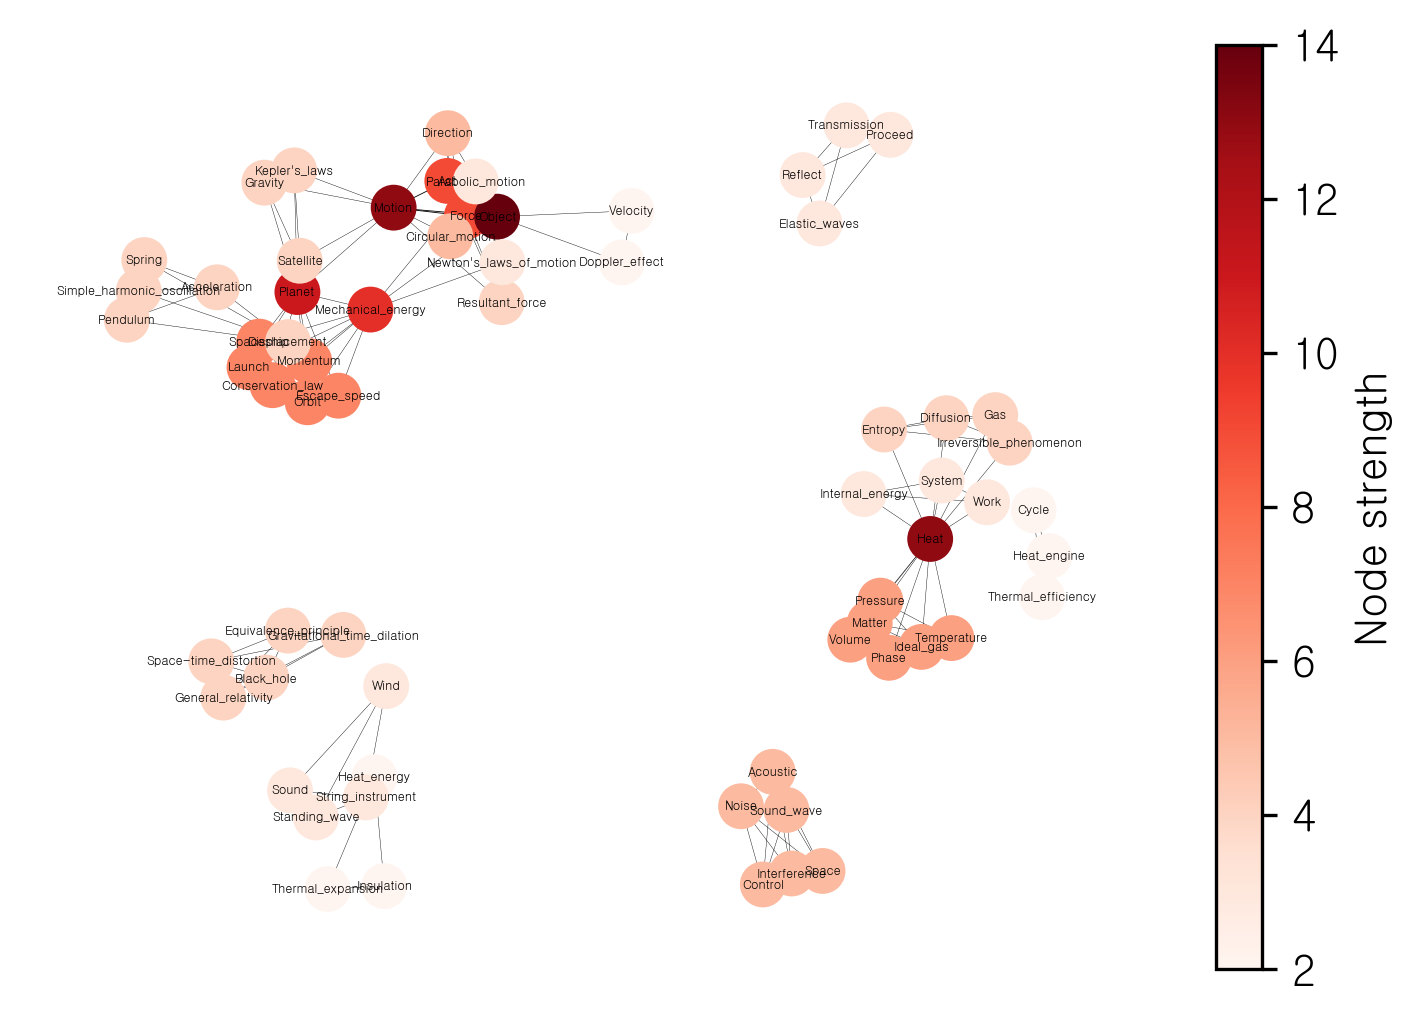

In [52]:
#(itr, seed, k, file_name)
subject_graph(150,8, 1.0, file_lst[4])

In [53]:
G = graph(file_lst[4])

Number of nodes: 66
Number of edges: 156
Degree avg: 4.73, Degree std: 2.32
EdgeWeight avg: 1.04, EdgeWeight std: 0.19
NodeWeight avg: 4.91, NodeWeight std: 2.68


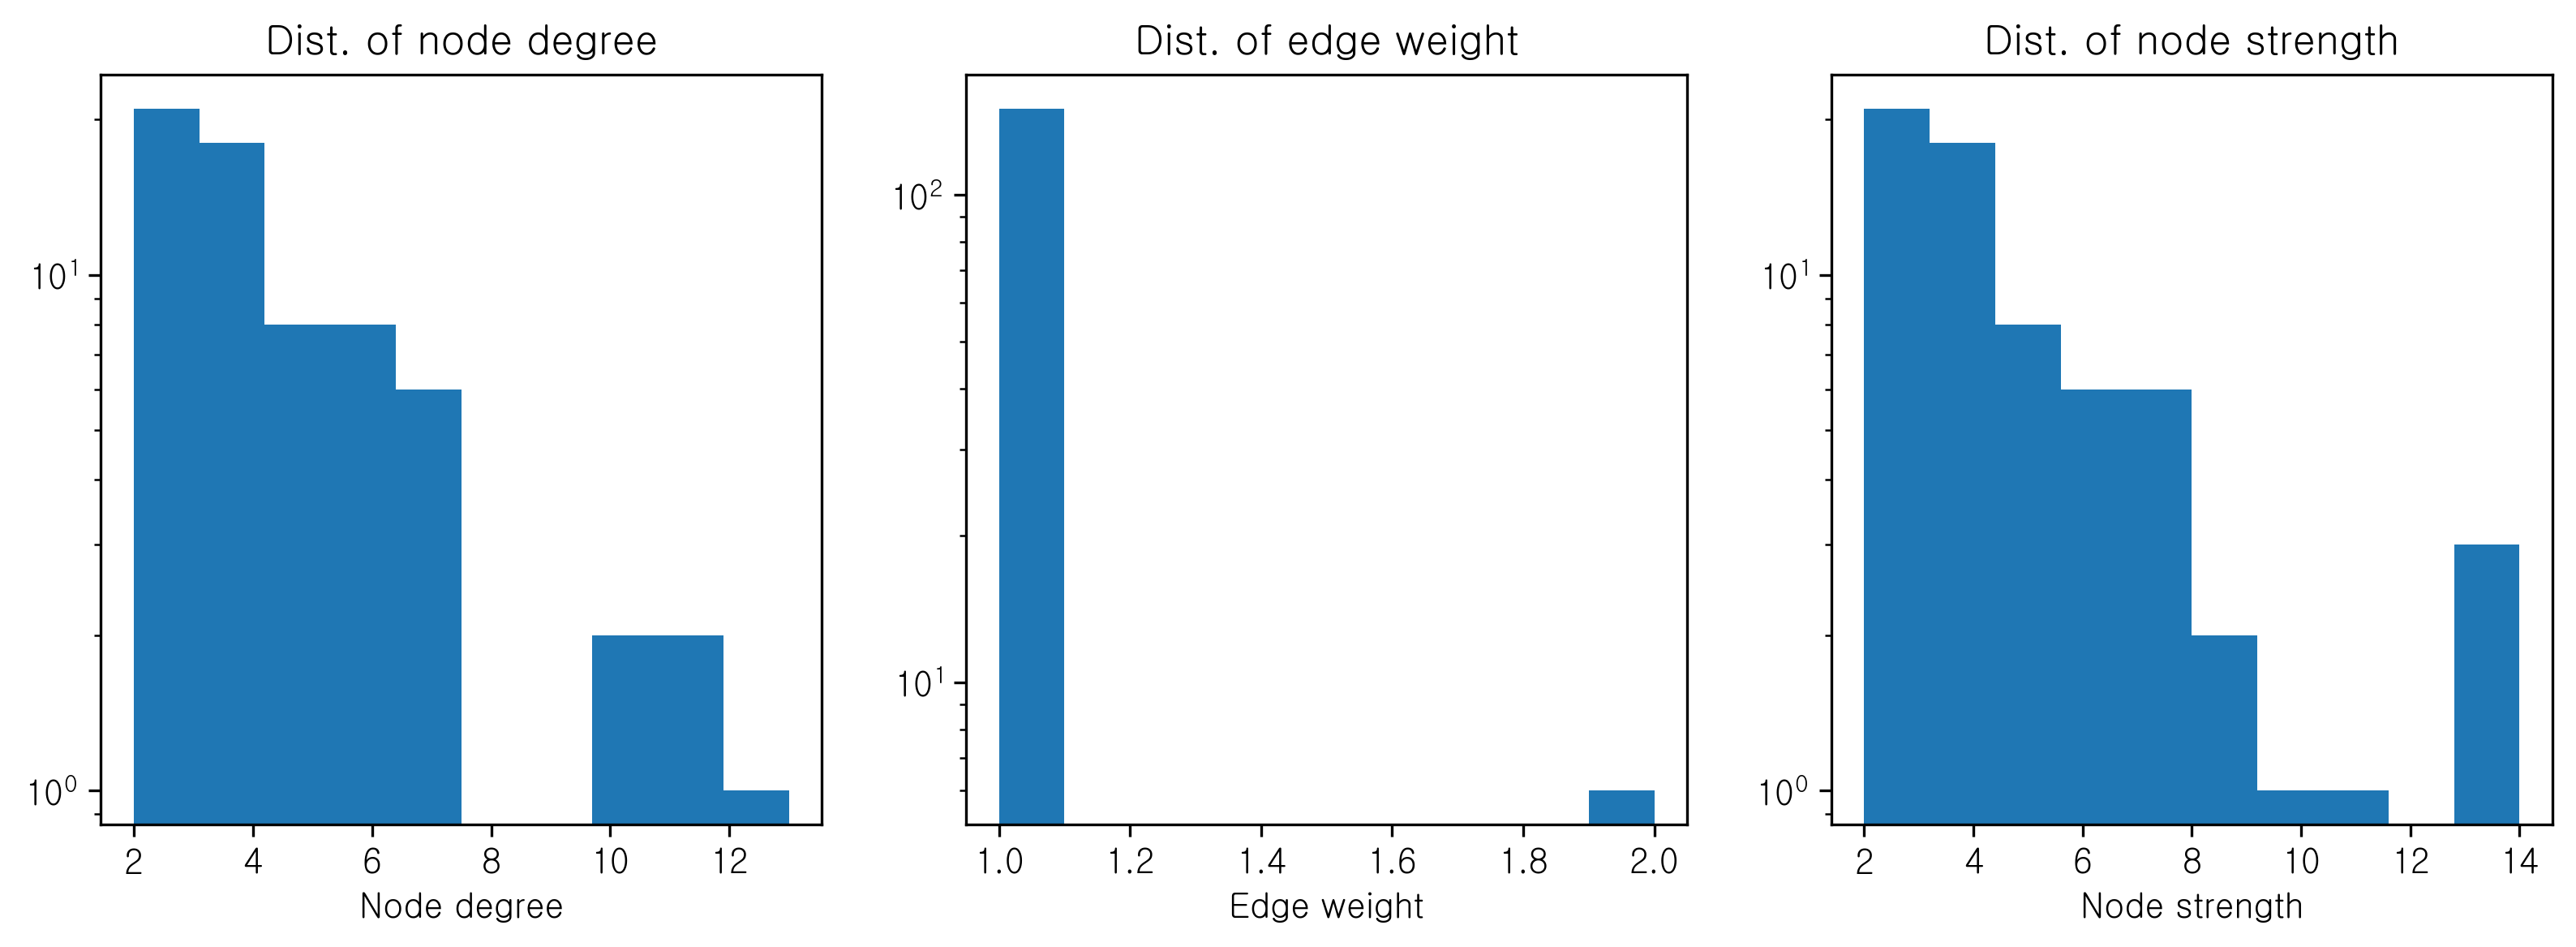

In [54]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [55]:
df = info(G)
df.head(20)

Node_ND  Node Degree                               Edge  \
0                Heat         13.0                       (Act, Force)   
1              Object         11.0                      (Act, Object)   
2              Planet         11.0                      (Act, Motion)   
3              Motion         10.0                    (Force, Object)   
4   Mechanical_energy         10.0                    (Force, Motion)   
5           Spaceship          7.0                   (Object, Motion)   
6              Launch          7.0             (Act, Resultant_force)   
7            Momentum          7.0                   (Act, Direction)   
8               Orbit          7.0             (Act, Circular_motion)   
9    Conservation_law          7.0           (Force, Resultant_force)   
10       Escape_speed          7.0                 (Force, Direction)   
11                Act          6.0           (Force, Circular_motion)   
12              Force          6.0          (Resultant_force, Object)   
13           Pressure          6.0          (Resultant_force, Motion)   
14        Temperature          6.0  (Object, Newton's_laws_of_motion)   
15             Matter          6.0         (Object, Parabolic_motion)   
16          Ideal_gas          6.0        (Object, Mechanical_energy)   
17             Volume          6.0                (Object, Direction)   
18              Phase          6.0          (Object, Circular_motion)   
19          Direction          5.0                 (Object, Velocity)   

    Edge Weight            Node_NS  Node Strength                  Node_BC  \
0             2             Object           14.0                   Object   
1             2             Motion           13.0                   Motion   
2             2               Heat           13.0                   Planet   
3             2             Planet           11.0        Mechanical_energy   
4             2  Mechanical_energy           10.0                      Act   
5             2                Act            9.0                    Force   
6             1              Force            9.0            Kepler's_laws   
7             1          Spaceship            7.0                Satellite   
8             1             Launch            7.0                  Gravity   
9             1           Momentum            7.0  Newton's_laws_of_motion   
10            1              Orbit            7.0         Parabolic_motion   
11            1   Conservation_law            7.0             Escape_speed   
12            1       Escape_speed            7.0                Spaceship   
13            1           Pressure            6.0         Conservation_law   
14            1        Temperature            6.0                    Orbit   
15            1             Matter            6.0                 Momentum   
16            1          Ideal_gas            6.0                   Launch   
17            1             Volume            6.0                Direction   
18            1              Phase            6.0          Circular_motion   
19            1          Direction            5.0          Resultant_force   

    Betweenness Centrality  
0                 0.451729  
1                 0.376993  
2                 0.352644  
3                 0.316766  
4                 0.108096  
5                 0.108096  
6                 0.084323  
7                 0.084323  
8                 0.084323  
9                 0.082907  
10                0.082907  
11                0.069909  
12                0.069909  
13                0.069909  
14                0.069909  
15                0.069909  
16                0.069909  
17                0.053538  
18                0.053538  
19                0.042350

## 전자기와 양자

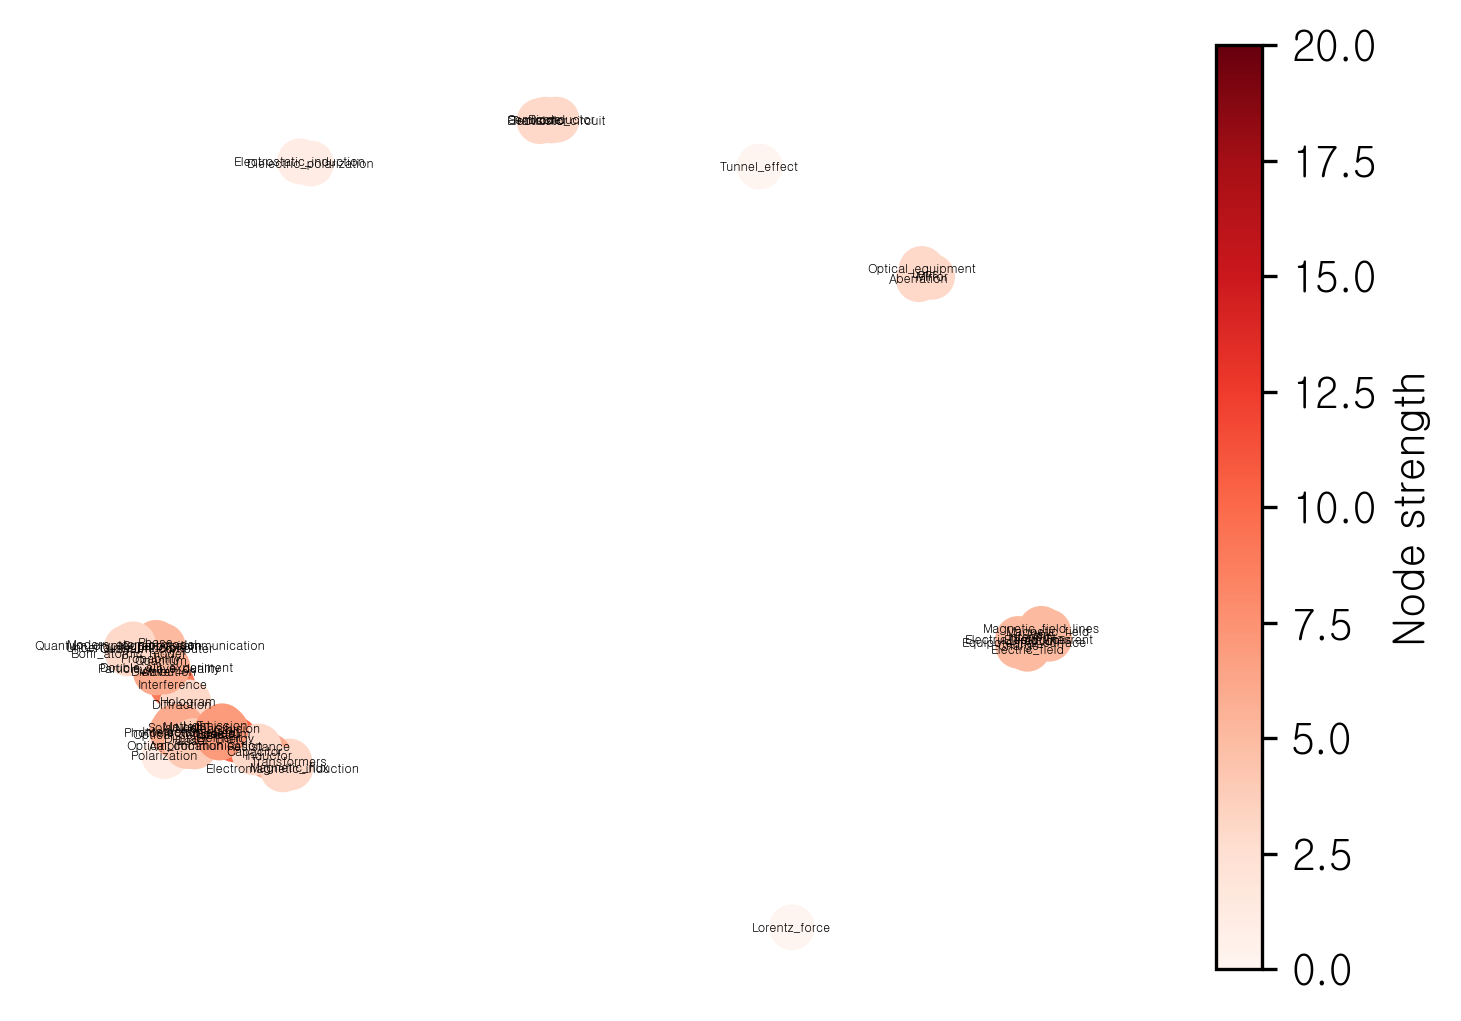

In [56]:
subject_graph(1000, 10, 1, file_lst[5])

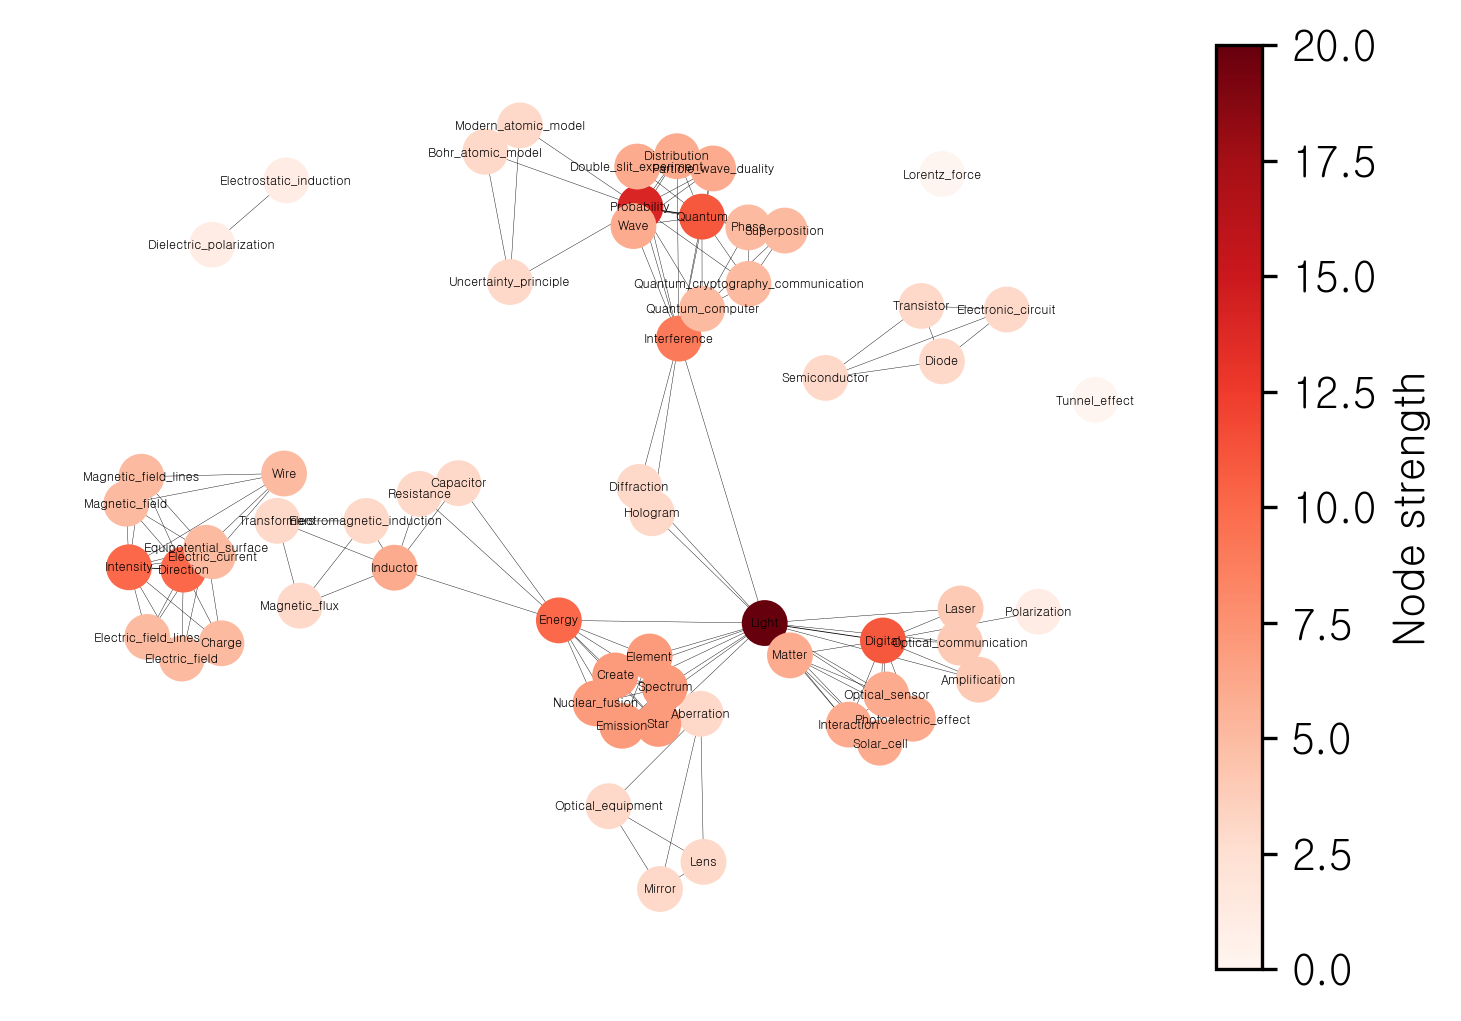

In [57]:
subject_graph(120, 1, 1, file_lst[5])

In [58]:
G = graph(file_lst[5])

Number of nodes: 62
Number of edges: 160
Degree avg: 5.16, Degree std: 3.08
EdgeWeight avg: 1.02, EdgeWeight std: 0.14
NodeWeight avg: 5.26, NodeWeight std: 3.29


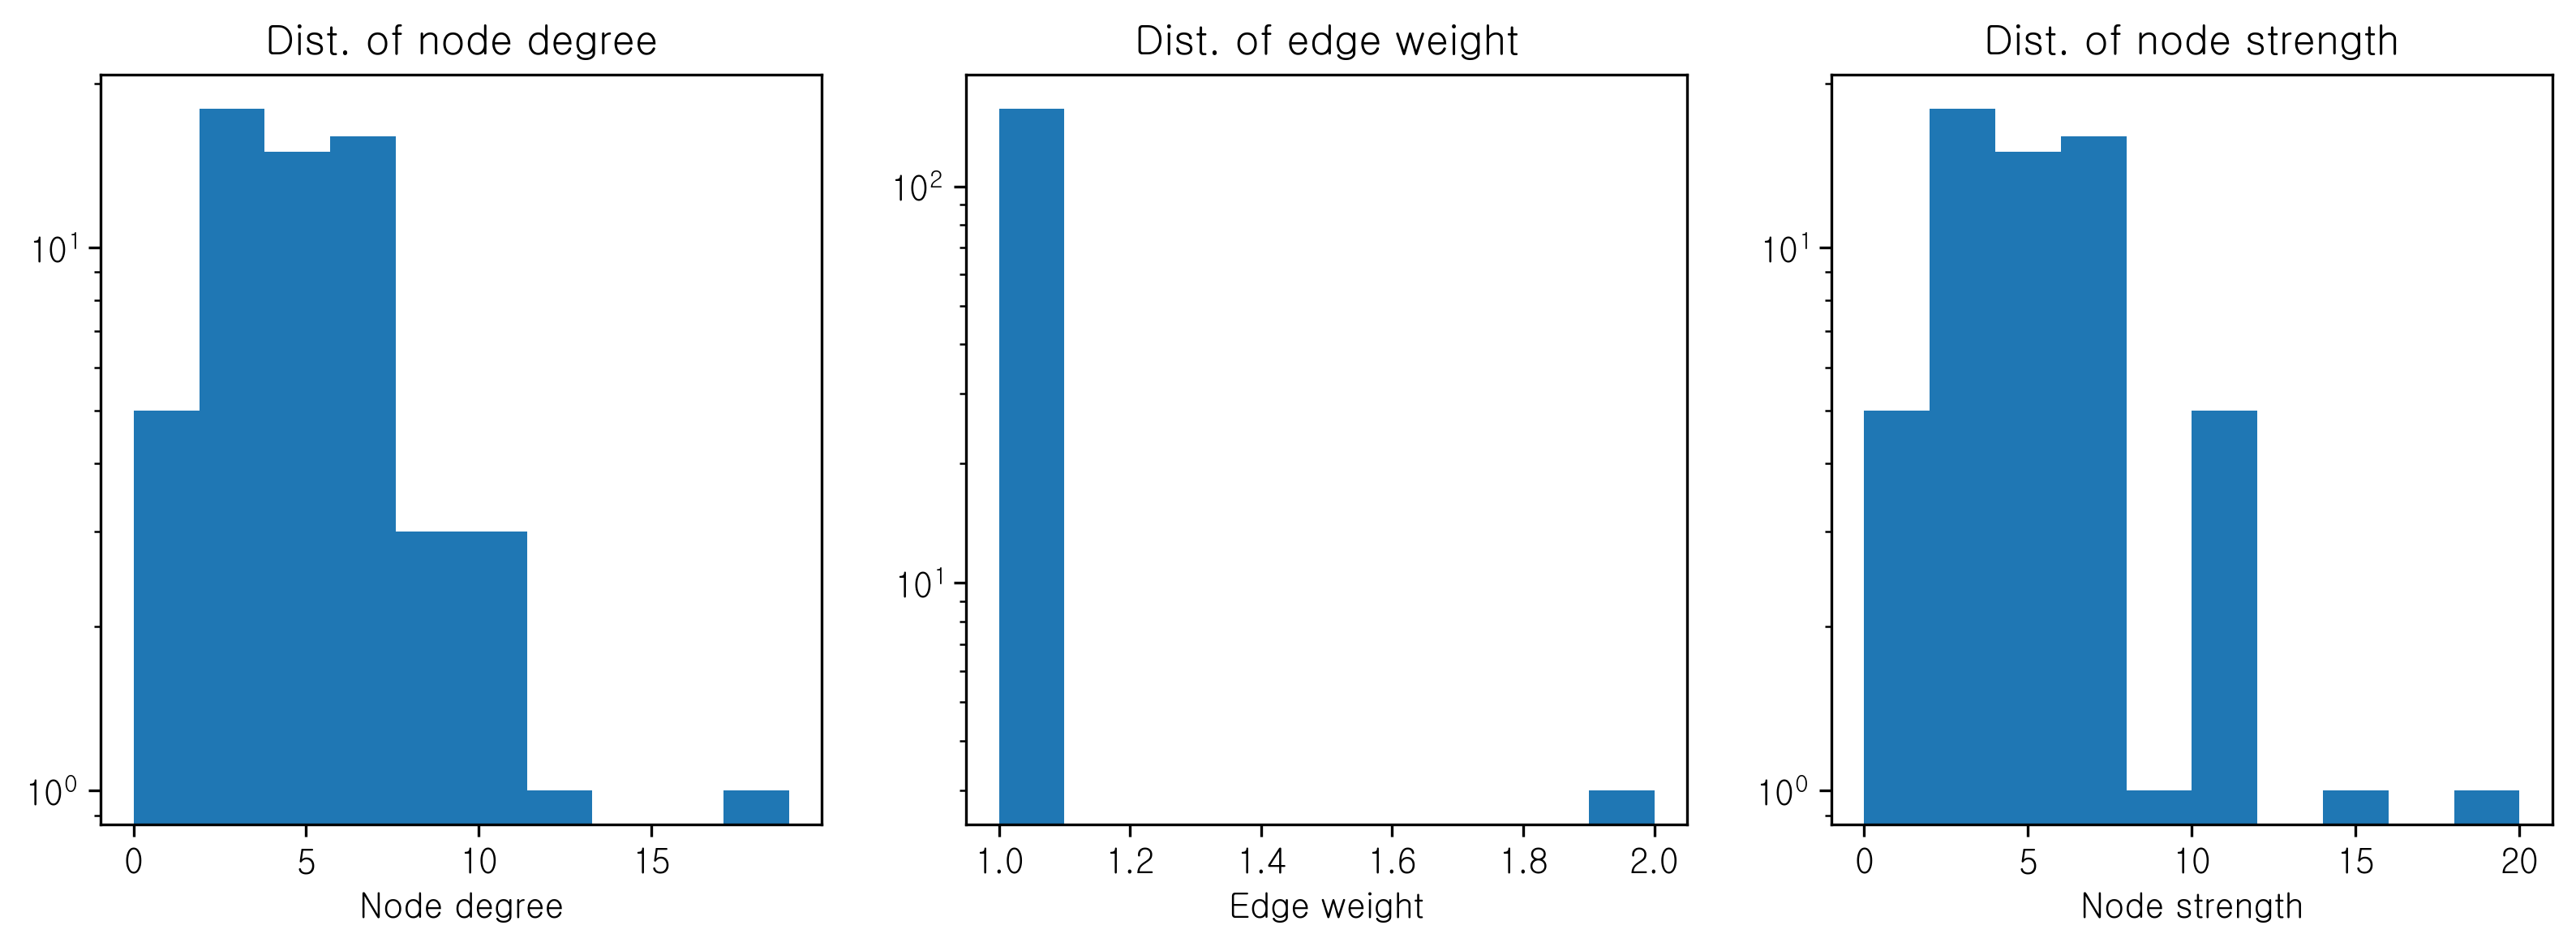

In [59]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [60]:
df = info(G)
df.head(20)

Node_ND  Node Degree                                    Edge  \
0                  Light         19.0                  (Direction, Intensity)   
1            Probability         13.0                        (Light, Digital)   
2                 Energy         10.0                  (Probability, Quantum)   
3                Digital         10.0             (Direction, Electric_field)   
4                Quantum         10.0       (Direction, Electric_field_lines)   
5              Direction          9.0                     (Direction, Charge)   
6              Intensity          9.0      (Direction, Equipotential_surface)   
7           Interference          9.0           (Direction, Electric_current)   
8               Spectrum          7.0             (Direction, Magnetic_field)   
9                 Create          7.0                       (Direction, Wire)   
10               Element          7.0       (Direction, Magnetic_field_lines)   
11                  Star          7.0             (Intensity, Electric_field)   
12              Emission          7.0       (Intensity, Electric_field_lines)   
13        Nuclear_fusion          7.0                     (Intensity, Charge)   
14              Inductor          6.0      (Intensity, Equipotential_surface)   
15        Optical_sensor          6.0           (Intensity, Electric_current)   
16            Solar_cell          6.0             (Intensity, Magnetic_field)   
17                Matter          6.0                       (Intensity, Wire)   
18           Interaction          6.0       (Intensity, Magnetic_field_lines)   
19  Photoelectric_effect          6.0  (Electric_field, Electric_field_lines)   

    Edge Weight               Node_NS  Node Strength                 Node_BC  \
0             2                 Light           20.0                   Light   
1             2           Probability           14.0            Interference   
2             2               Digital           11.0                  Energy   
3             1               Quantum           11.0             Probability   
4             1             Direction           10.0                Inductor   
5             1             Intensity           10.0                 Digital   
6             1                Energy           10.0                 Quantum   
7             1          Interference            9.0             Diffraction   
8             1              Spectrum            7.0                Hologram   
9             1                Create            7.0   Particle_wave_duality   
10            1               Element            7.0            Distribution   
11            1                  Star            7.0  Double_slit_experiment   
12            1              Emission            7.0                    Wave   
13            1        Nuclear_fusion            7.0                Spectrum   
14            1              Inductor            6.0                    Star   
15            1        Optical_sensor            6.0                  Create   
16            1            Solar_cell            6.0          Nuclear_fusion   
17            1                Matter            6.0                 Element   
18            1           Interaction            6.0                Emission   
19            1  Photoelectric_effect            6.0               Capacitor   

    Betweenness Centrality  
0                 0.711296  
1                 0.482223  
2                 0.300101  
3                 0.268500  
4                 0.170040  
5                 0.168730  
6                 0.165962  
7                 0.126181  
8                 0.126181  
9                 0.069701  
10                0.069701  
11                0.069701  
12                0.069701  
13                0.062247  
14                0.062247  
15                0.062247  
16                0.062247  
17                0.062247  
18                0.062247  
19                0.058704